In [16]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# NSD

In [17]:
# List of subject identifiers
subjects = [1, 2, 5, 7]

# File name patterns (without subject number)
file_types = [
    "emonet_vdvae_sub{:02d}.pkl",
    "emonet_versatile_sub{:02d}.pkl",
    "memnet_vdvae_sub{:02d}.pkl",
    "memnet_versatile_sub{:02d}.pkl"
]

# Load all files for each subject into distinct variables
for sub in subjects:
    for file_pattern in file_types:
        filename = file_pattern.format(sub)
        path = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{filename}"
        var_name = filename.replace(".pkl", "")  # e.g., "emonet_vdvae_sub01"
        with open(path, "rb") as f:
            globals()[var_name] = pickle.load(f)
        print(f"Loaded {var_name}")

# ✅ Example: Access alpha_0 scores from emonet_vdvae_sub01
print(emonet_vdvae_sub01["alpha_0"][:5])  # First 5 scores
print(memnet_versatile_sub07.keys())      # List alpha levels for subj07


Loaded emonet_vdvae_sub01
Loaded emonet_versatile_sub01
Loaded memnet_vdvae_sub01
Loaded memnet_versatile_sub01
Loaded emonet_vdvae_sub02
Loaded emonet_versatile_sub02
Loaded memnet_vdvae_sub02
Loaded memnet_versatile_sub02
Loaded emonet_vdvae_sub05
Loaded emonet_versatile_sub05
Loaded memnet_vdvae_sub05
Loaded memnet_versatile_sub05
Loaded emonet_vdvae_sub07
Loaded emonet_versatile_sub07
Loaded memnet_vdvae_sub07
Loaded memnet_versatile_sub07
[0.5158658623695374, 0.3536190688610077, 0.5134514570236206, 0.3611520826816559, 0.49133962392807007]
dict_keys(['alpha_0', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha_-2', 'alpha_-3', 'alpha_-4'])


# Human Data

In [18]:
data_path = "/home/rothermm/brain-diffuser/data/human_data/human_df_detrended.csv"

try:
    df_detrended = pd.read_csv(data_path)
    print(f"✅ Detrended data loaded successfully from:\n  {data_path}")
except FileNotFoundError:
    raise FileNotFoundError(f"❌ Could not find file at: {data_path}")

# ===============================================
# 🔎 Inspect data
# ===============================================
# Show first few rows
print("\n📄 First 5 rows:")
print(df_detrended.head())

# Check columns
print("\n📝 Columns:")
print(df_detrended.columns.tolist())

# Unique subjects
print("\n👥 Unique subjects:")
print(df_detrended['SubjectID'].unique())

# Unique conditions
print("\n📦 Unique conditions:")
print(df_detrended['Condition'].unique())

# Data types
print("\n🔤 Data types:")
print(df_detrended.dtypes)

# ===============================================
# 🧹 Optional: Set Condition as categorical and sorted
# ===============================================
conditions_order = [
    'alpha0', 'mem-2', 'mem-4', 'mem+2', 'mem+4',
    'valence-2', 'valence-4', 'valence+2', 'valence+4'
]
if set(conditions_order).intersection(df_detrended['Condition']):
    df_detrended['Condition'] = pd.Categorical(
        df_detrended['Condition'],
        categories=conditions_order,
        ordered=True
    )

# ===============================================
# 📦 Output summary stats
# ===============================================
print("\n📊 Summary statistics:")
print(df_detrended.describe())

✅ Detrended data loaded successfully from:
  /home/rothermm/brain-diffuser/data/human_data/human_df_detrended.csv

📄 First 5 rows:
   SubjectID Condition  ValenceRating  MemorabilityRating
0          1    alpha0      56.750567           61.706183
1          1    alpha0      67.020776           64.248593
2          1    alpha0      49.378485           54.663503
3          1    alpha0      47.479945           13.150913
4          1    alpha0      51.700154           55.375823

📝 Columns:
['SubjectID', 'Condition', 'ValenceRating', 'MemorabilityRating']

👥 Unique subjects:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]

📦 Unique conditions:
['alpha0' 'mem-2' 'mem-4' 'mem+4' 'mem+2' 'valence-2' 'valence-4'
 'valence+2' 'valence+4']

🔤 Data types:
SubjectID               int64
Condition              object
ValenceRating         float64
MemorabilityRating    float64
dtype: object

📊 Summary statistics:
         SubjectID  ValenceRating  MemorabilityRating
count  6480.000000    6480.

# Graph A

In [19]:
# ─────────────────────────────────────────────────────────────────────────────
# Styling to match the “Normalized Model and Human Trends” figure
# ─────────────────────────────────────────────────────────────────────────────
sns.set_style(
    "whitegrid",
    {
        "grid.color": "white",
        "grid.linestyle": "-",
        "grid.linewidth": 1.2,
    }
)
sns.set_context("notebook", font_scale=1.2)

mpl.rcParams.update({
    # Figure
    "figure.figsize": (16, 12),
    "axes.facecolor": "#EAEAF2",

    # Grid
    "grid.color": "white",
    "grid.linestyle": "-",
    "grid.linewidth": 1.2,

    # Titles & Labels
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 14,
    "axes.labelweight": "bold",

    # Ticks
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,

    # Legend
    "legend.fontsize": 12,
    "legend.title_fontsize": 12,

    # Lines & Markers
    "lines.linewidth": 2.5,
    "lines.markersize": 8,
    "lines.markeredgewidth": 0,
})
# ─────────────────────────────────────────────────────────────────────────────

# Without Human data

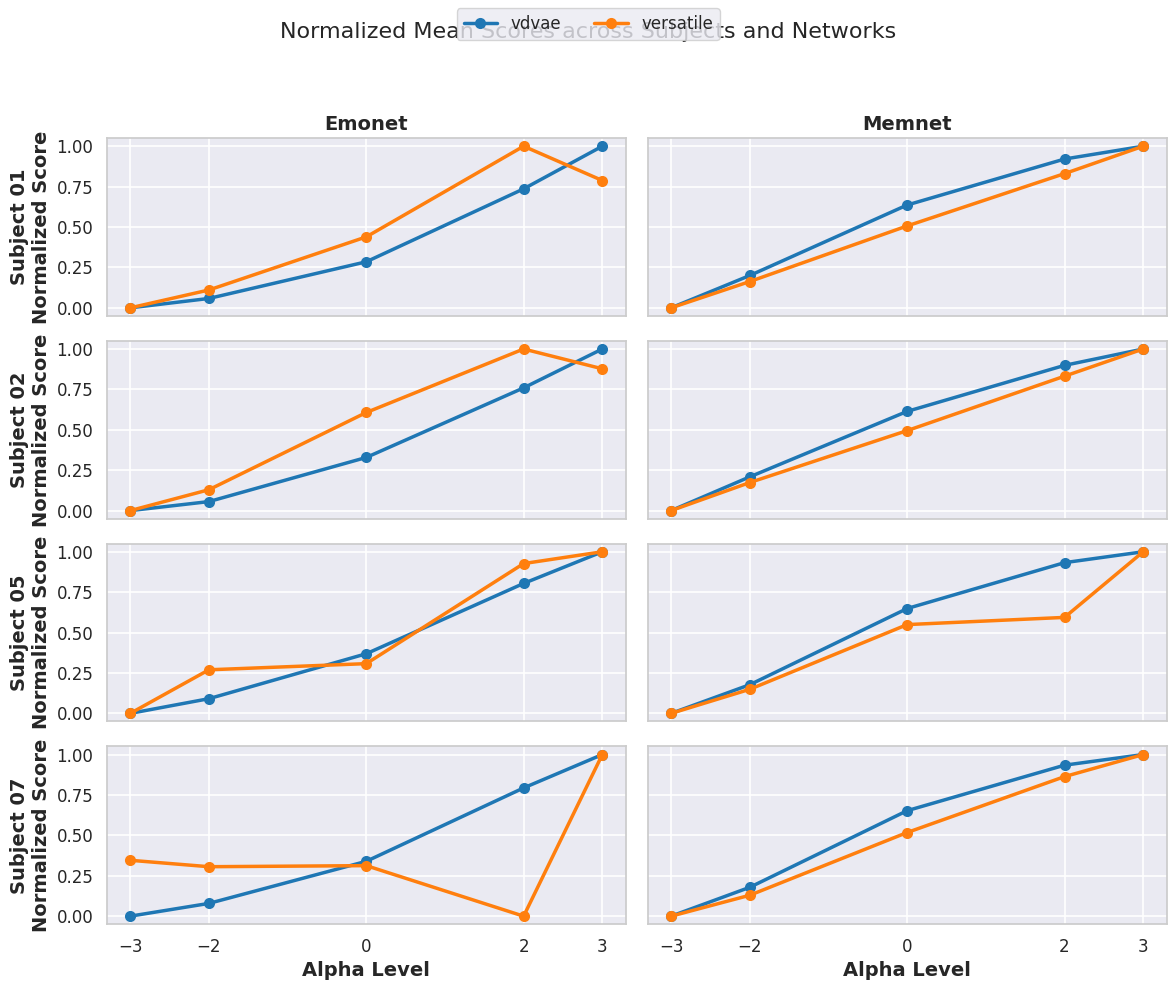

In [20]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Subjects, models, and networks
subjects = [1, 2, 5, 7]
models = ['vdvae', 'versatile']
networks = ['emonet', 'memnet']
alpha_levels = ['alpha_-3', 'alpha_-2', 'alpha_0', 'alpha_2', 'alpha_3']

# Load all data into nested dictionary
all_data = {net: {model: {} for model in models} for net in networks}

for sub in subjects:
    for net in networks:
        for model in models:
            file_name = f"{net}_{model}_sub{sub:02d}.pkl"
            path = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{file_name}"
            with open(path, "rb") as f:
                all_data[net][model][sub] = pickle.load(f)

# Prepare a single figure with multiple panels (4 subjects x 2 networks = 8 panels)
fig, axs = plt.subplots(len(subjects), len(networks), figsize=(12, 10), sharex=True, sharey=True)

# Flatten axs if it's 2D for easier indexing
if axs.ndim == 1:
    axs = axs.reshape(len(subjects), len(networks))

# Plot each subject/network
for i, sub in enumerate(subjects):
    for j, net in enumerate(networks):
        ax = axs[i, j]
        all_mean_data = []

        # For each model (vdvae/versatile)
        for model in models:
            data = all_data[net][model][sub]

            # Extract mean scores for the alpha levels
            mean_scores = []
            alpha_numeric = []
            for alpha in alpha_levels:
                scores = np.array(data[alpha])
                mean_val = scores.mean()
                mean_scores.append(mean_val)
                alpha_numeric.append(int(alpha.split('_')[1]))

            # Min-max normalize mean scores
            min_val, max_val = np.min(mean_scores), np.max(mean_scores)
            normalized_mean_scores = (np.array(mean_scores) - min_val) / (max_val - min_val)

            # Plot model curve
            ax.plot(
                alpha_numeric,
                normalized_mean_scores,
                marker='o',
                label=model
            )

        # Titles and labels
        if i == 0:
            ax.set_title(f"{net.capitalize()}")
        if j == 0:
            ax.set_ylabel(f"Subject {sub:02d}\nNormalized Score")

        ax.set_xticks(alpha_numeric)
        if i == len(subjects) - 1:
            ax.set_xlabel("Alpha Level")

# Place a single legend for all panels
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(models), fontsize=12)

fig.suptitle("Normalized Mean Scores across Subjects and Networks", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


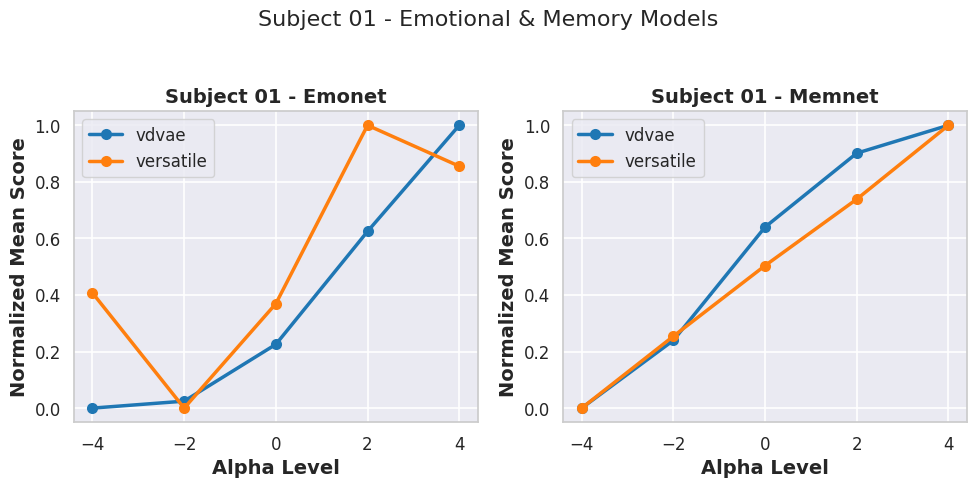

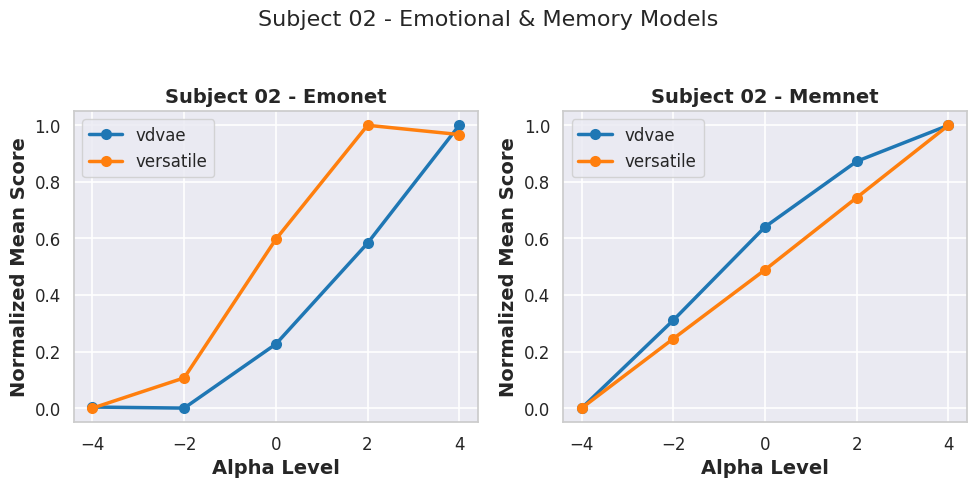

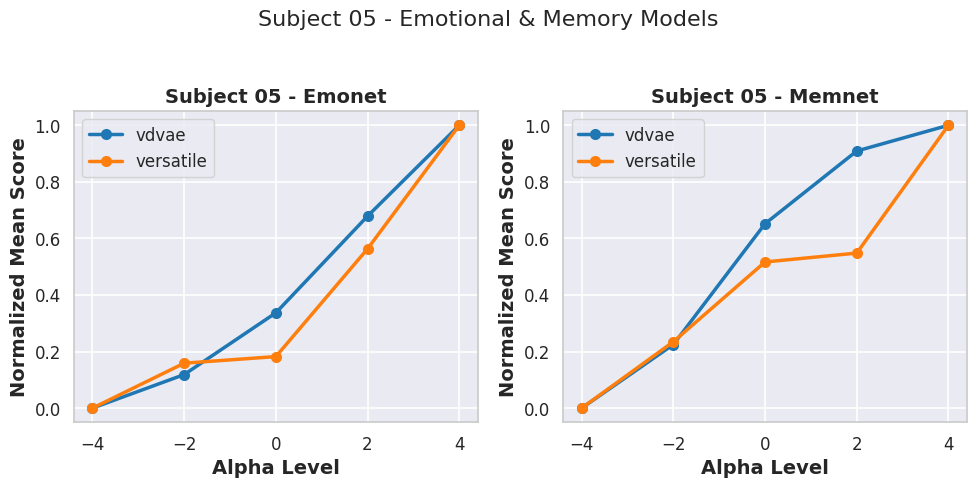

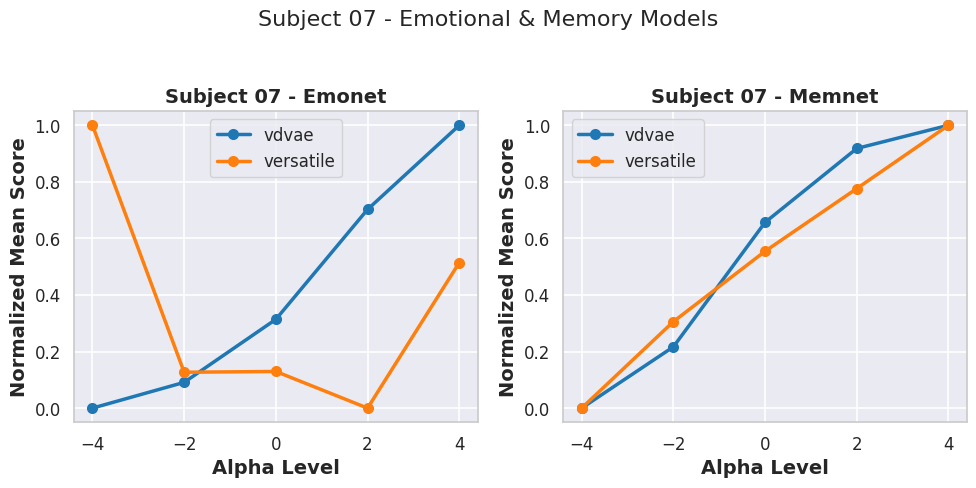

In [21]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Subjects and models
subjects = [1, 2, 5, 7]
models = ['vdvae', 'versatile']
networks = ['emonet', 'memnet']

# Alpha levels in desired order
alpha_levels = ['alpha_-4', 'alpha_-2', 'alpha_0', 'alpha_2', 'alpha_4']

# Load all data into a nested dictionary
all_data = {net: {model: {} for model in models} for net in networks}

for sub in subjects:
    for net in networks:
        for model in models:
            file_name = f"{net}_{model}_sub{sub:02d}.pkl"
            path = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{file_name}"
            with open(path, "rb") as f:
                all_data[net][model][sub] = pickle.load(f)

# Plotting for each subject
for sub in subjects:
    # Prepare figure
    plt.figure(figsize=(10, 5))
    
    # For each network (emonet/memnet), create a subplot
    for i, net in enumerate(networks, 1):
        plt.subplot(1, 2, i)
        all_mean_data = []

        # For each model (vdvae/versatile)
        for model in models:
            data = all_data[net][model][sub]

            # Extract and sort alpha levels
            mean_scores = []
            alpha_numeric = []
            for alpha in alpha_levels:
                scores = np.array(data[alpha])
                mean_val = scores.mean()
                mean_scores.append(mean_val)
                alpha_numeric.append(int(alpha.split('_')[1]))

            # Min-max normalize mean scores (after mean, like your code)
            min_val, max_val = np.min(mean_scores), np.max(mean_scores)
            normalized_mean_scores = (np.array(mean_scores) - min_val) / (max_val - min_val)

            # Create DataFrame for plotting
            df = pd.DataFrame({
                'Alpha': alpha_numeric,
                'NormalizedScore': normalized_mean_scores,
                'Model': model
            })
            all_mean_data.append(df)

        # Concatenate dataframes for both models
        plot_df = pd.concat(all_mean_data)

        # Plot using seaborn-like style
        for model in models:
            model_df = plot_df[plot_df['Model'] == model]
            plt.plot(model_df['Alpha'], model_df['NormalizedScore'], marker='o', label=model)
        
        plt.title(f"Subject {sub:02d} - {net.capitalize()}")
        plt.xlabel("Alpha Level")
        plt.ylabel("Normalized Mean Score")
        plt.xticks(alpha_numeric)
        plt.legend()

    plt.suptitle(f"Subject {sub:02d} - Emotional & Memory Models", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# With human data

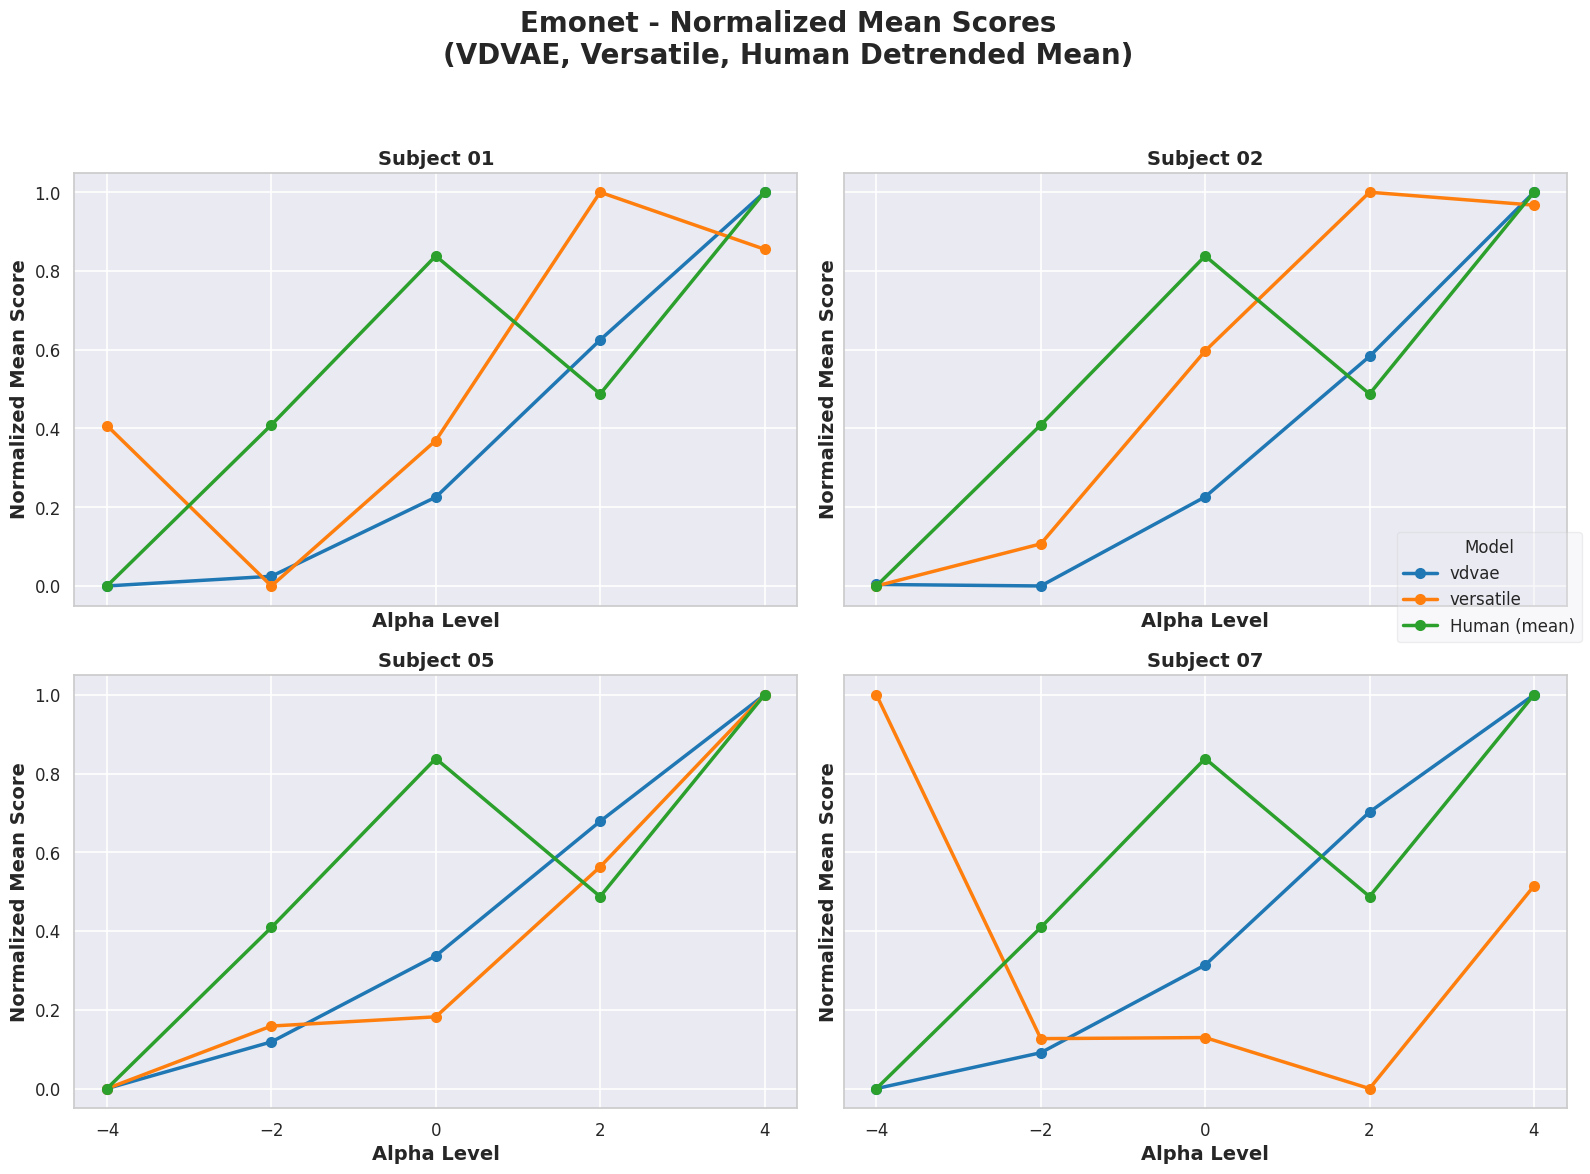

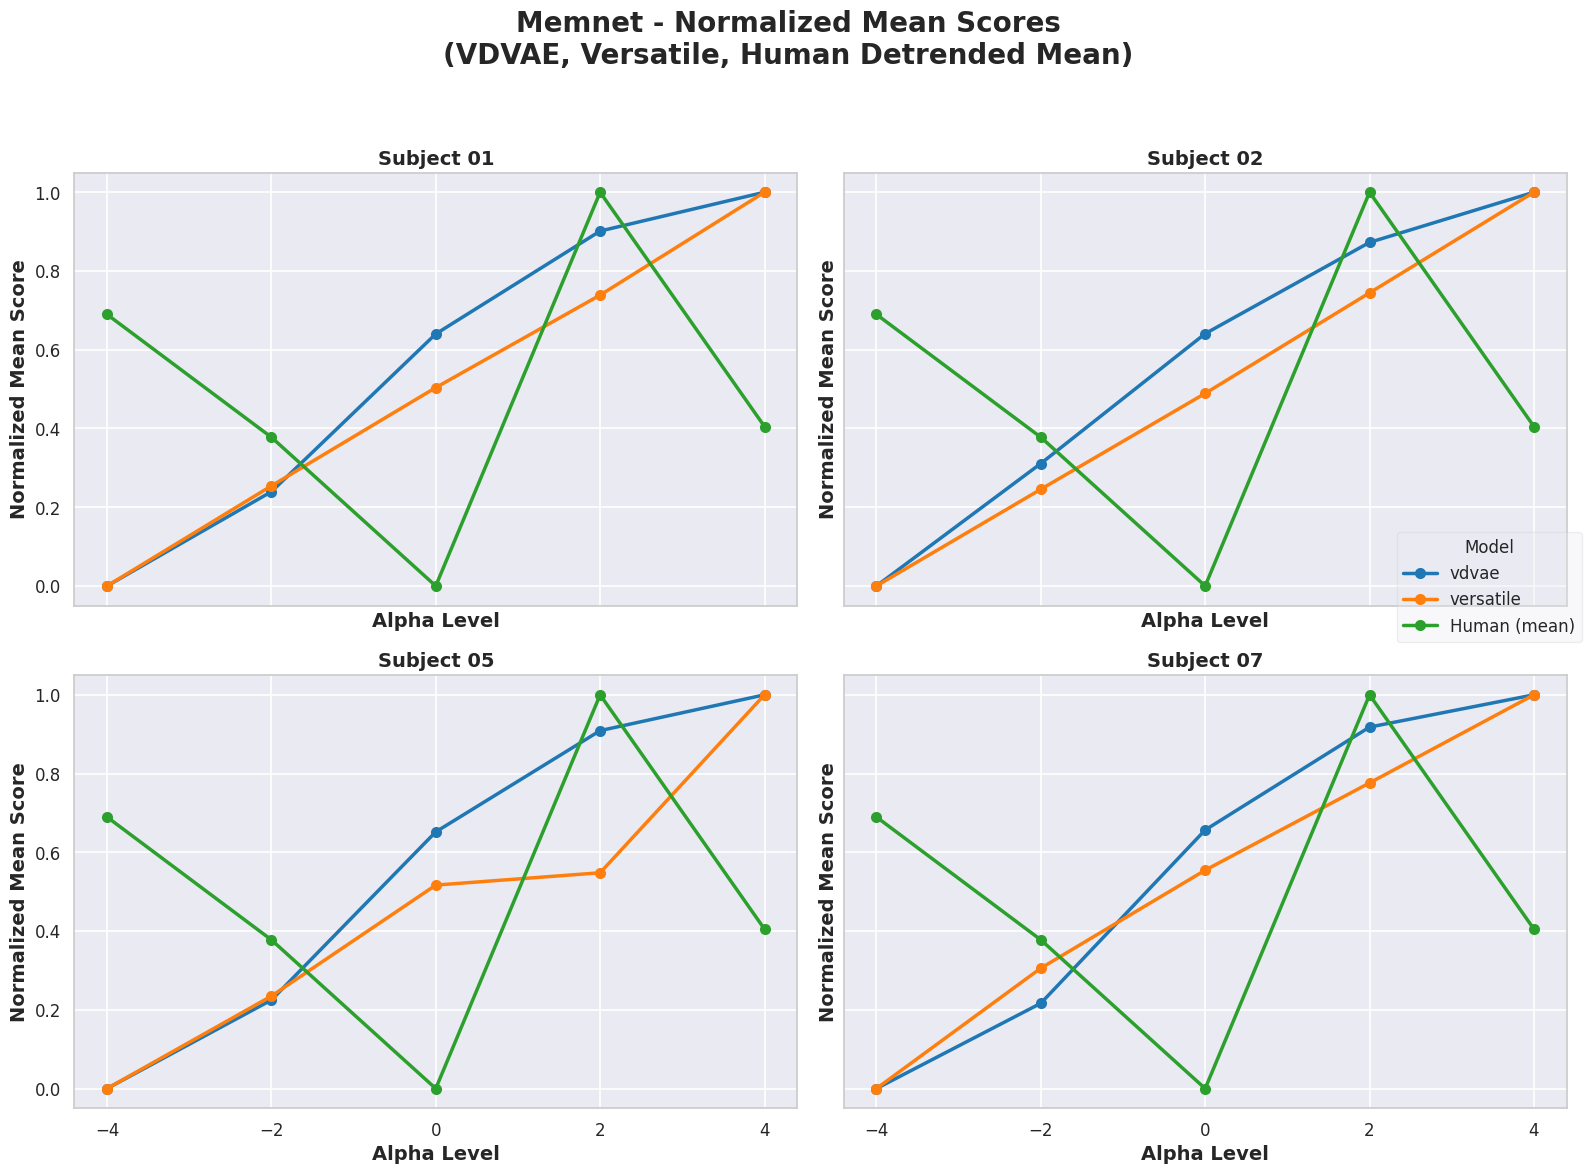

In [22]:
# Subjects and models
subjects = [1, 2, 5, 7]
models = ['vdvae', 'versatile']
networks = ['emonet', 'memnet']

# Alpha levels in desired order
alpha_levels = ['alpha_-4', 'alpha_-2', 'alpha_0', 'alpha_2', 'alpha_4']

# ✅ Load detrended human data
human_path = "/home/rothermm/brain-diffuser/data/human_data/human_df_detrended.csv"
df_human = pd.read_csv(human_path)

# Map alpha levels for human data
alpha_map = {
    'valence-4': -4, 'valence-2': -2, 'alpha0': 0, 'valence+2': 2, 'valence+4': 4,
    'mem-4': -4,     'mem-2': -2,     'alpha0': 0, 'mem+2': 2,       'mem+4': 4
}
df_human['Alpha'] = df_human['Condition'].map(alpha_map)

# Load all model data into a nested dictionary
all_data = {net: {model: {} for model in models} for net in networks}

for sub in subjects:
    for net in networks:
        for model in models:
            file_name = f"{net}_{model}_sub{sub:02d}.pkl"
            path = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{file_name}"
            with open(path, "rb") as f:
                all_data[net][model][sub] = pickle.load(f)

# ================================================
# 📊 Plotting: One figure per network
# ================================================
for net in networks:
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
    axs = axs.flatten()

    # Select relevant human data
    if net == 'emonet':
        relevant_conditions = ['valence-4', 'valence-2', 'alpha0', 'valence+2', 'valence+4']
        human_col = 'ValenceRating'
    else:
        relevant_conditions = ['mem-4', 'mem-2', 'alpha0', 'mem+2', 'mem+4']
        human_col = 'MemorabilityRating'

    human_net_df = df_human[df_human['Condition'].isin(relevant_conditions)]

    # Compute human means per alpha level
    human_means = (
        human_net_df.groupby('Alpha')[human_col]
        .mean()
        .reindex([-4, -2, 0, 2, 4])
    )

    # Min-max normalize human data
    human_min, human_max = human_means.min(), human_means.max()
    human_norm = (human_means - human_min) / (human_max - human_min)

    # Add to DataFrame for plotting
    df_human_plot = pd.DataFrame({
        'Alpha': human_means.index,
        'NormalizedScore': human_norm,
        'Model': 'Human (mean)'
    })

    for idx, sub in enumerate(subjects):
        ax = axs[idx]
        all_mean_data = []

        # For each model (vdvae/versatile)
        for model in models:
            data = all_data[net][model][sub]

            # Extract and sort alpha levels
            mean_scores = []
            alpha_numeric = []
            for alpha in alpha_levels:
                scores = np.array(data[alpha])
                mean_val = scores.mean()
                mean_scores.append(mean_val)
                alpha_numeric.append(int(alpha.split('_')[1]))

            # Min-max normalize model scores
            min_val, max_val = np.min(mean_scores), np.max(mean_scores)
            normalized_mean_scores = (np.array(mean_scores) - min_val) / (max_val - min_val)

            # Add to DataFrame
            df_model = pd.DataFrame({
                'Alpha': alpha_numeric,
                'NormalizedScore': normalized_mean_scores,
                'Model': model
            })
            all_mean_data.append(df_model)

        # Add human mean data (same for all subjects in this network)
        all_mean_data.append(df_human_plot)

        # Concatenate all data
        plot_df = pd.concat(all_mean_data)

        # Plot each line
        for model_name in plot_df['Model'].unique():
            model_df = plot_df[plot_df['Model'] == model_name]
            ax.plot(
                model_df['Alpha'],
                model_df['NormalizedScore'],
                marker='o',
                label=model_name if idx == 0 else None
            )

        ax.set_title(f"Subject {sub:02d}")  # uses rcParams["axes.titlesize"]
        ax.set_xticks([-4, -2, 0, 2, 4])
        ax.set_xlabel("Alpha Level")
        ax.set_ylabel("Normalized Mean Score")

    # Legend styling
    # Legend styling (with title and vertical layout on the right)
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(
        handles, labels,
        title='Model',           # ← add a title
        title_fontsize=12,       # ← match entry font size
        loc='center right',      # ← inside the figure, on the right
        ncol=1,                  # ← one column (vertical list)
        frameon=True,
        framealpha=0.3,
        fontsize=12
    )


    # Figure title
    fig.suptitle(
        f"{net.capitalize()} - Normalized Mean Scores\n"
        "(VDVAE, Versatile, Human Detrended Mean)",
        fontsize=20,
        fontweight='bold'
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


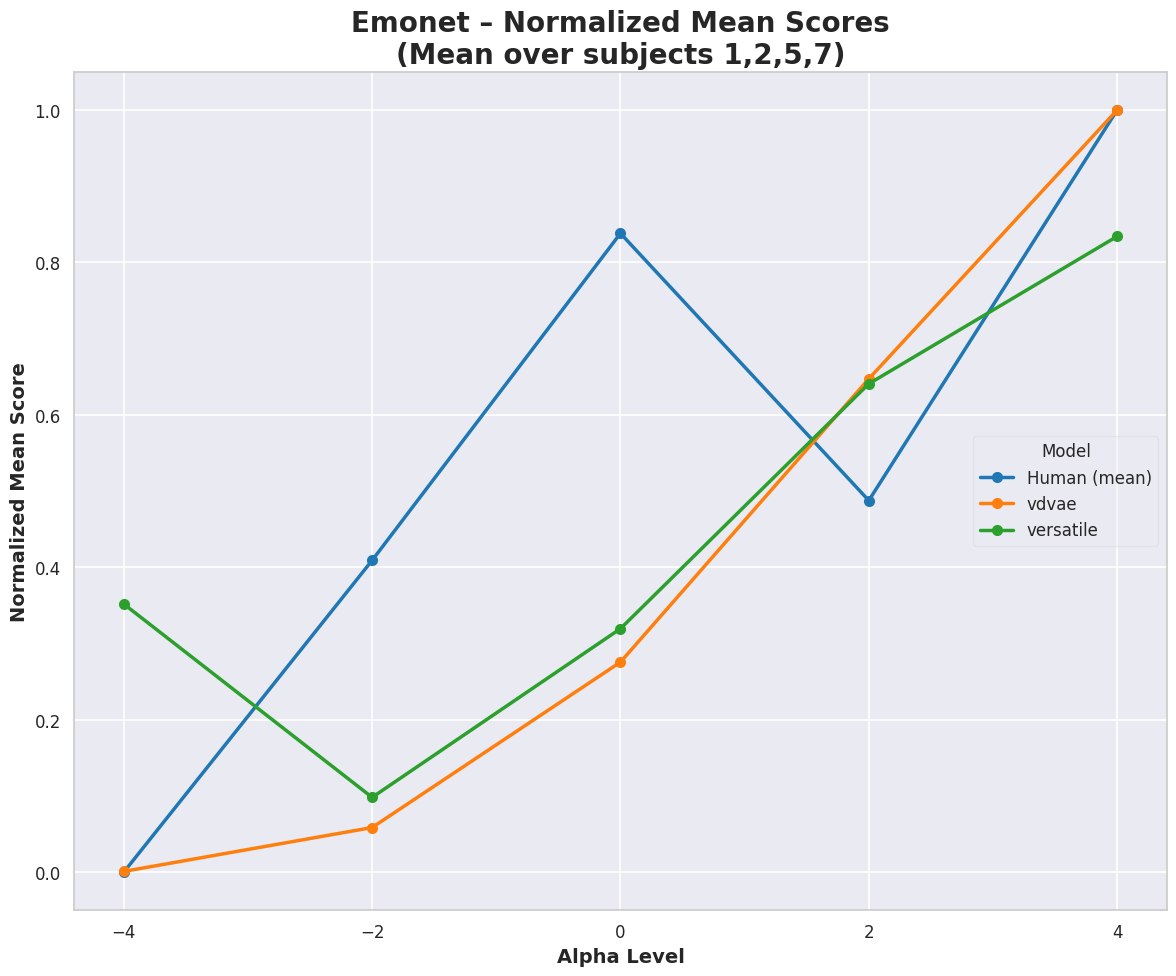

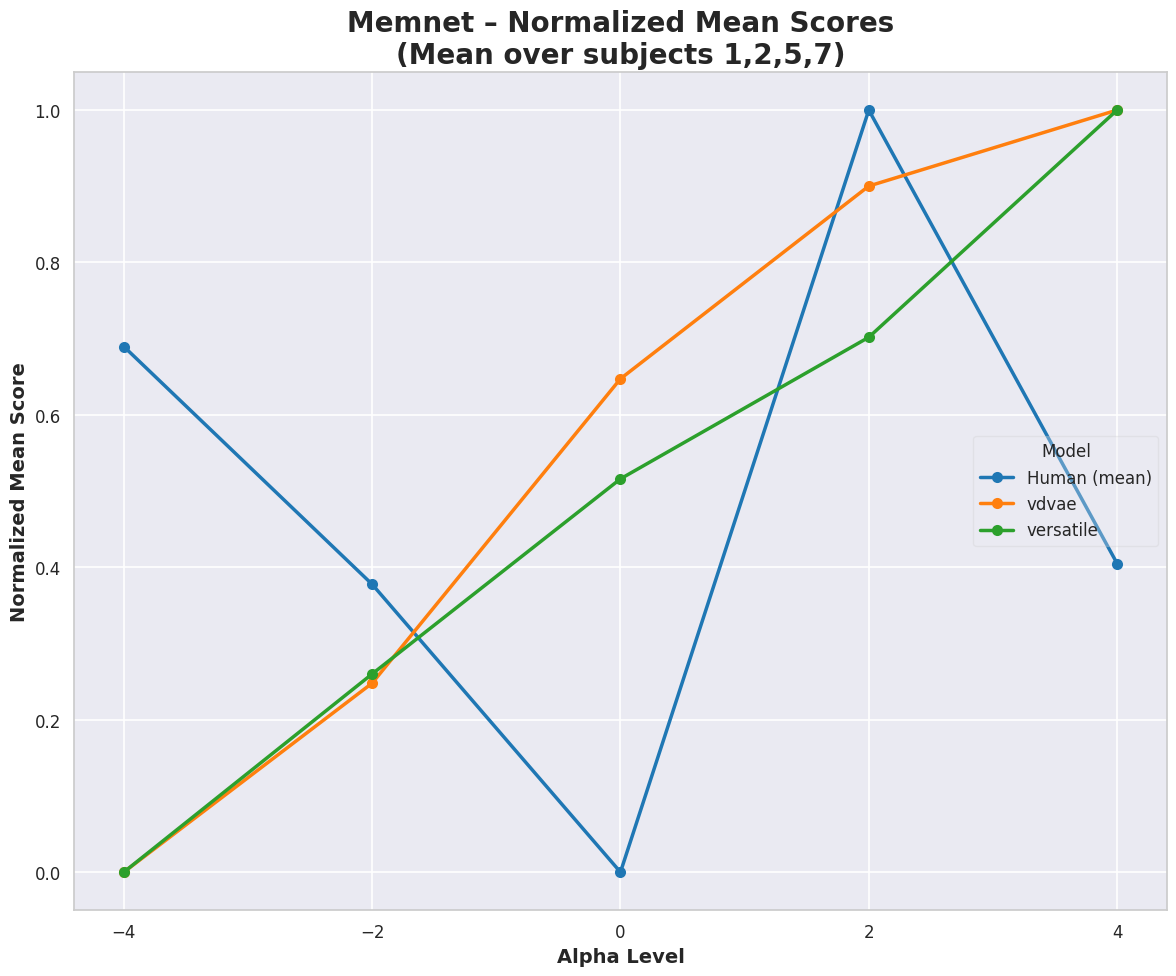

In [25]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# ─────────────────────────────────────────────────────────────────────────────
# Styling to match the “Normalized Model and Human Trends” figure
# ─────────────────────────────────────────────────────────────────────────────
sns.set_style(
    "whitegrid",
    {
        "grid.color": "white",
        "grid.linestyle": "-",
        "grid.linewidth": 1.2,
    }
)
sns.set_context("notebook", font_scale=1.2)

mpl.rcParams.update({
    # Figure
    "figure.figsize": (12, 10),
    "axes.facecolor": "#EAEAF2",

    # Grid
    "grid.color": "white",
    "grid.linestyle": "-",
    "grid.linewidth": 1.2,

    # Titles & Labels
    "axes.titlesize": 20,
    "axes.titleweight": "bold",
    "axes.labelsize": 14,
    "axes.labelweight": "bold",

    # Ticks
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,

    # Legend
    "legend.fontsize": 12,
    "legend.title_fontsize": 12,

    # Lines & Markers
    "lines.linewidth": 2.5,
    "lines.markersize": 8,
    "lines.markeredgewidth": 0,
})
# ─────────────────────────────────────────────────────────────────────────────

# Subjects and models
subjects = [1, 2, 5, 7]
models = ['vdvae', 'versatile']
networks = ['emonet', 'memnet']

# Alpha levels in desired order
alpha_levels = ['alpha_-4', 'alpha_-2', 'alpha_0', 'alpha_2', 'alpha_4']
alpha_numeric = [-4, -2, 0, 2, 4]

# ✅ Load detrended human data
df_human = pd.read_csv(
    "/home/rothermm/brain-diffuser/data/human_data/human_df_detrended.csv"
)

# Map alpha levels for human data
alpha_map = {
    'valence-4': -4, 'valence-2': -2, 'alpha0': 0, 'valence+2': 2, 'valence+4': 4,
    'mem-4':     -4, 'mem-2':     -2, 'alpha0': 0, 'mem+2':      2, 'mem+4':     4
}
df_human['Alpha'] = df_human['Condition'].map(alpha_map)

# Load all model data
all_data = {net: {model: {} for model in models} for net in networks}
for sub in subjects:
    for net in networks:
        for model in models:
            fn = f"{net}_{model}_sub{sub:02d}.pkl"
            p  = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{fn}"
            with open(p, "rb") as f:
                all_data[net][model][sub] = pickle.load(f)

# ─────────────────────────────────────────────────────────────────────────────
# Plot one panel per network, averaging the two models over all subjects
# ─────────────────────────────────────────────────────────────────────────────
for net in networks:
    # 1) Prepare the unchanged human line
    if net == 'emonet':
        conds = ['valence-4','valence-2','alpha0','valence+2','valence+4']
        human_col = 'ValenceRating'
    else:
        conds = ['mem-4','mem-2','alpha0','mem+2','mem+4']
        human_col = 'MemorabilityRating'

    human_net = df_human[df_human['Condition'].isin(conds)]
    hm = human_net.groupby('Alpha')[human_col].mean().reindex(alpha_numeric)
    hmin, hmax = hm.min(), hm.max()
    hnorm = (hm - hmin) / (hmax - hmin)
    df_human_plot = pd.DataFrame({
        'Alpha': alpha_numeric,
        'NormalizedScore': hnorm.values,
        'Model': 'Human (mean)'
    })

    # 2) Compute per‐model average across subjects
    model_dfs = []
    for model in models:
        # collect each subject’s normalized vector
        subj_norms = []
        for sub in subjects:
            data = all_data[net][model][sub]
            # raw means per alpha
            means = [np.mean(data[a]) for a in alpha_levels]
            # per‐subject min‐max normalize
            mn, mx = np.min(means), np.max(means)
            subj_norms.append((np.array(means) - mn) / (mx - mn))
        # average across subs
        avg_norm = np.mean(np.vstack(subj_norms), axis=0)
        model_dfs.append(pd.DataFrame({
            'Alpha': alpha_numeric,
            'NormalizedScore': avg_norm,
            'Model': model
        }))

    # 3) Concatenate and plot
    plot_df = pd.concat(model_dfs + [df_human_plot], ignore_index=True)
    fig, ax = plt.subplots()
    for name, grp in plot_df.groupby('Model'):
        ax.plot(
            grp['Alpha'],
            grp['NormalizedScore'],
            marker='o',
            label=name
        )

    ax.set_xticks(alpha_numeric)
    ax.set_xlabel("Alpha Level")
    ax.set_ylabel("Normalized Mean Score")
    ax.set_title(
        f"{net.capitalize()} – Normalized Mean Scores\n"
        "(Mean over subjects 1,2,5,7)",
        fontsize=20, fontweight='bold'
    )

    # Legend: vertical with title “Model” on right
    h, l = ax.get_legend_handles_labels()
    ax.legend(
        h, l,
        title="Model",
        title_fontsize=12,
        fontsize=12,
        loc='center right',
        frameon=True,
        framealpha=0.3,
        ncol=1
    )

    plt.tight_layout()
    plt.show()


# ANalyze Subject 7

=== Subject 07 Emonet-Versatile Score Summary by Alpha ===
 alpha  count     mean      std      min       q1   median       q3      max      skew  kurtosis
    -4    982 0.590494 0.106733 0.224207 0.518971 0.596424 0.662959 0.914399 -0.211352 -0.110614
    -2    982 0.548857 0.114717 0.138254 0.462803 0.544442 0.634758 0.931617  0.110746 -0.249352
     0    982 0.548988 0.115802 0.219256 0.462688 0.548068 0.624521 0.953076  0.206633 -0.208504
     2    982 0.542811 0.113174 0.207564 0.462663 0.544189 0.616536 0.946077  0.040424 -0.165592
     4    982 0.567340 0.115649 0.205729 0.486016 0.565749 0.648438 0.940891  0.017719 -0.224457


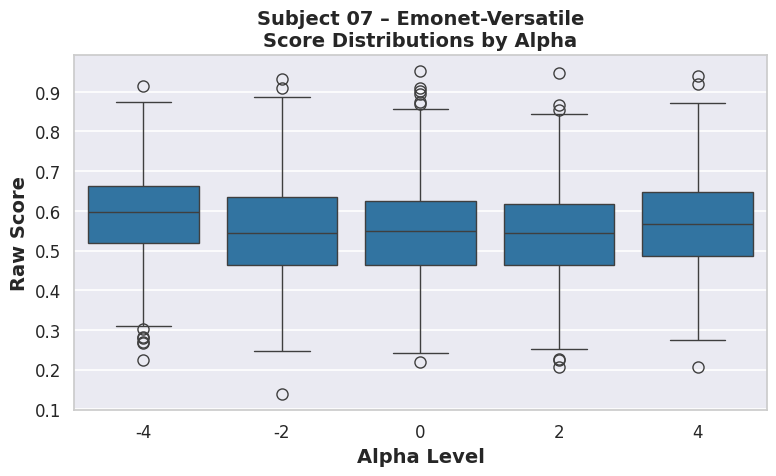

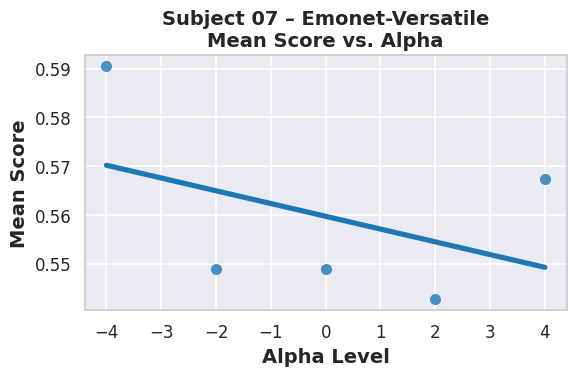

In [23]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sub = 7
net = 'emonet'
model = 'versatile'
alpha_levels = ['alpha_-4', 'alpha_-2', 'alpha_0', 'alpha_2', 'alpha_4']

# Load the raw scores for Subject 07, Emonet-Versatile
path = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{net}_{model}_sub{sub:02d}.pkl"
with open(path, "rb") as f:
    data = pickle.load(f)

# Build a long-form DataFrame of (image, alpha, score)
records = []
for alpha_key in alpha_levels:
    alpha_val = int(alpha_key.split('_')[1])
    scores = np.array(data[alpha_key])
    for img_idx, score in enumerate(scores):
        records.append({
            'image_idx': img_idx,
            'alpha': alpha_val,
            'score': score
        })
df = pd.DataFrame.from_records(records)

# 1) Summary statistics by alpha
summary = df.groupby('alpha')['score'].agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    q1=lambda x: x.quantile(0.25),
    median='median',
    q3=lambda x: x.quantile(0.75),
    max='max',
    skew=lambda x: x.skew(),
    kurtosis=lambda x: x.kurtosis(),
).reset_index()
print("=== Subject 07 Emonet-Versatile Score Summary by Alpha ===")
print(summary.to_string(index=False))

# 2) Boxplot of the full score distributions per alpha
plt.figure(figsize=(8, 5))
sns.boxplot(x='alpha', y='score', data=df)
plt.title("Subject 07 – Emonet-Versatile\nScore Distributions by Alpha")
plt.xlabel("Alpha Level")
plt.ylabel("Raw Score")
plt.tight_layout()
plt.show()

# 3) (Optional) Scatter + trend line for mean scores
mean_df = summary[['alpha', 'mean']]
plt.figure(figsize=(6, 4))
sns.regplot(x='alpha', y='mean', data=mean_df, marker='o', ci=None)
plt.title("Subject 07 – Emonet-Versatile\nMean Score vs. Alpha")
plt.xlabel("Alpha Level")
plt.ylabel("Mean Score")
plt.tight_layout()
plt.show()


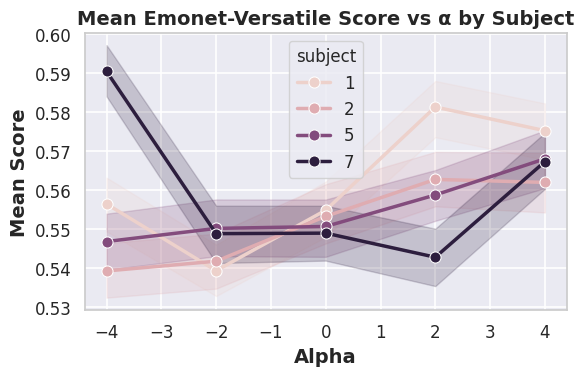

Per‐subject response slopes:
    subject     slope
0        1  0.003983
1        2  0.003323
2        5  0.002552
3        7 -0.002618

T‐tests at each α (Subj 7 vs Subjs 1,2,5):
 α=-4: t=10.86, p=0.000
 α=-2: t=1.21, p=0.227
 α= 0: t=-0.93, p=0.354
 α= 2: t=-5.93, p=0.000
 α= 4: t=-0.26, p=0.796


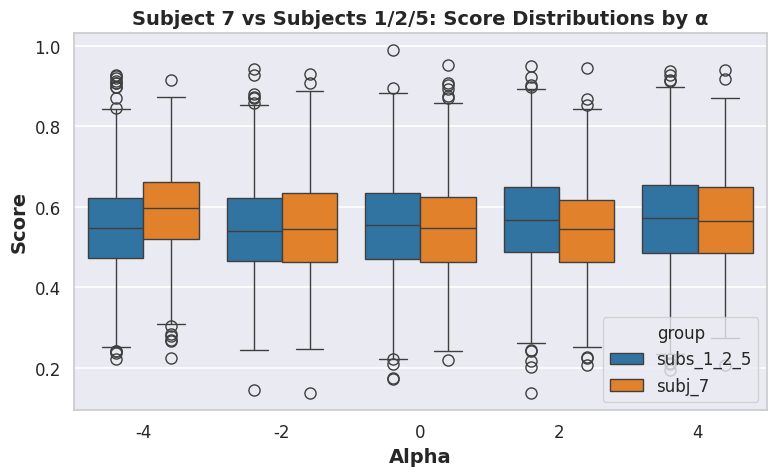

In [24]:
import pickle
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Settings
subjects = [1, 2, 5, 7]
net = 'emonet'
model = 'versatile'
alpha_levels = ['alpha_-4', 'alpha_-2', 'alpha_0', 'alpha_2', 'alpha_4']
alpha_numeric = [int(a.split('_')[1]) for a in alpha_levels]

# 1) Build a single long‐form DataFrame across subjects
records = []
base = Path("/home/rothermm/brain-diffuser/results/assessor_scores")
for sub in subjects:
    path = base / f"subj{sub:02d}" / f"{net}_{model}_sub{sub:02d}.pkl"
    with open(path, "rb") as f:
        data = pickle.load(f)
    for alpha_key, α in zip(alpha_levels, alpha_numeric):
        scores = np.array(data[alpha_key])
        for img_idx, score in enumerate(scores):
            records.append({
                'subject': sub,
                'alpha': α,
                'image': img_idx,
                'score': score
            })
df = pd.DataFrame(records)

# 2) Plot each subject’s mean‐score vs alpha to see the curves
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='alpha', y='score', hue='subject', estimator='mean', marker='o')
plt.title("Mean Emonet‐Versatile Score vs α by Subject")
plt.xlabel("Alpha")
plt.ylabel("Mean Score")
plt.tight_layout()
plt.show()

# 3) Compute per‐subject slopes (from mean scores) and compare
slopes = []
for sub, grp in df.groupby('subject'):
    means = grp.groupby('alpha')['score'].mean().loc[alpha_numeric].values
    m, b = np.polyfit(alpha_numeric, means, 1)
    slopes.append({'subject': sub, 'slope': m})
slopes_df = pd.DataFrame(slopes)
print("Per‐subject response slopes:\n", slopes_df)

# 4) Test at each alpha whether Subject 7 differs from others
print("\nT‐tests at each α (Subj 7 vs Subjs 1,2,5):")
for α in alpha_numeric:
    s7 = df[(df.subject==7)&(df.alpha==α)]['score']
    others = df[(df.subject.isin([1,2,5]))&(df.alpha==α)]['score']
    t, p = stats.ttest_ind(s7, others, equal_var=False)
    print(f" α={α:>2}: t={t:.2f}, p={p:.3f}")

# 5) Boxplots: subject 7 vs pooled others
plt.figure(figsize=(8, 5))
df['group'] = df.subject.apply(lambda s: 'subj_7' if s==7 else 'subs_1_2_5')
sns.boxplot(data=df, x='alpha', y='score', hue='group')
plt.title("Subject 7 vs Subjects 1/2/5: Score Distributions by α")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


=== Subject‐Level Fit Summary ===
 Subject Network     Model     Slope  Intercept       R2
       1  emonet     vdvae  0.018941   0.500943 0.915149
       1  emonet versatile  0.003983   0.561469 0.554396
       1  memnet     vdvae  0.027128   0.745136 0.966914
       1  memnet versatile  0.007675   0.740942 0.999787
       2  emonet     vdvae  0.014041   0.499918 0.904095
       2  emonet versatile  0.003323   0.551834 0.912286
       2  memnet     vdvae  0.024662   0.749933 0.974544
       2  memnet versatile  0.005835   0.742633 0.999869
       5  emonet     vdvae  0.018123   0.494108 0.967766
       5  emonet versatile  0.002552   0.554918 0.888811
       5  memnet     vdvae  0.024217   0.744181 0.960941
       5  memnet versatile  0.003804   0.741639 0.947310
       7  emonet     vdvae  0.022861   0.494493 0.957729
       7  emonet versatile -0.002618   0.559698 0.179833
       7  memnet     vdvae  0.025378   0.744050 0.956890
       7  memnet versatile  0.005876   0.740319 0.9951

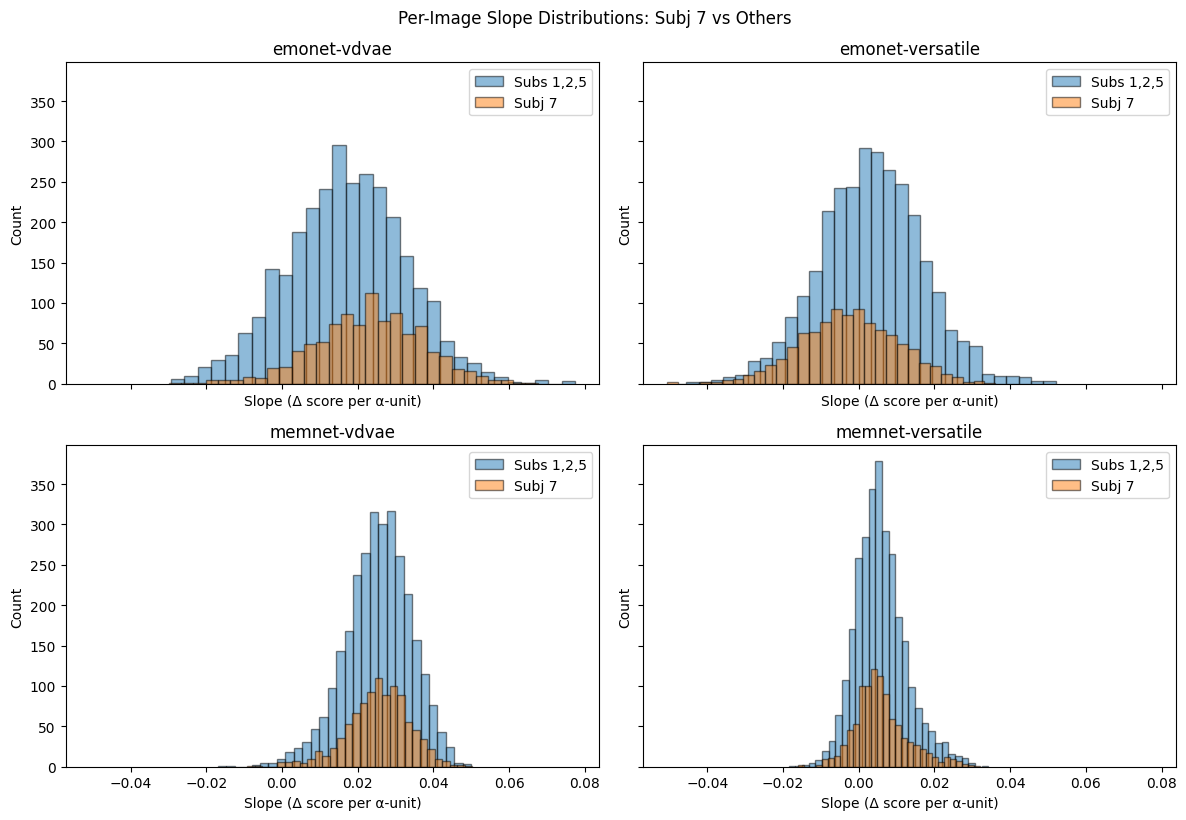

In [19]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Settings
subjects = [1, 2, 5, 7]
models = ['vdvae', 'versatile']
networks = ['emonet', 'memnet']
alpha_levels = ['alpha_-4', 'alpha_-2', 'alpha_0', 'alpha_2', 'alpha_4']
alpha_numeric = np.array([int(a.split('_')[1]) for a in alpha_levels])

# Load all data
all_data = {}
base_dir = Path("/home/rothermm/brain-diffuser/results/assessor_scores")
for sub in subjects:
    all_data[sub] = {}
    for net in networks:
        all_data[sub][net] = {}
        for model in models:
            p = base_dir / f"subj{sub:02d}" / f"{net}_{model}_sub{sub:02d}.pkl"
            with open(p, "rb") as f:
                all_data[sub][net][model] = pickle.load(f)

# 1) Compute subject‐level summary: slope & fit quality of mean scores
rows = []
for sub in subjects:
    for net in networks:
        for model in models:
            data = all_data[sub][net][model]
            means = np.array([np.mean(data[a]) for a in alpha_levels])
            # linear fit
            slope, intercept = np.polyfit(alpha_numeric, means, 1)
            # R^2
            preds = slope*alpha_numeric + intercept
            ss_res = np.sum((means - preds)**2)
            ss_tot = np.sum((means - means.mean())**2)
            r2 = 1 - ss_res/ss_tot
            rows.append({
                'Subject': sub,
                'Network': net,
                'Model': model,
                'Slope': slope,
                'Intercept': intercept,
                'R2': r2
            })

summary_df = pd.DataFrame(rows)
print("=== Subject‐Level Fit Summary ===")
print(summary_df.to_string(index=False))

# Highlight subject 7
print("\n--- Subject 7 Summary ---")
print(summary_df[summary_df.Subject == 7])

# 2) Compute per‐image slope distributions and compare subject 7 to pooled others
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

for idx, (net, model) in enumerate([(n,m) for n in networks for m in models]):
    ax = axes[idx]
    
    # all other subjects pooled
    pooled_slopes = []
    for sub in [s for s in subjects if s != 7]:
        data = all_data[sub][net][model]
        scores = np.vstack([data[a] for a in alpha_levels]).T
        slopes = np.polyfit(alpha_numeric, scores.T, 1)[0]  # vectorized: returns slopes for each image
        pooled_slopes.append(slopes)
    pooled_slopes = np.concatenate(pooled_slopes)
    
    # subject 7
    data7 = all_data[7][net][model]
    scores7 = np.vstack([data7[a] for a in alpha_levels]).T
    slopes7 = np.polyfit(alpha_numeric, scores7.T, 1)[0]
    
    # Plot
    ax.hist(pooled_slopes, bins=30, alpha=0.5, label='Subs 1,2,5', edgecolor='black')
    ax.hist(slopes7,       bins=30, alpha=0.5, label='Subj 7',       edgecolor='black')
    ax.set_title(f"{net}-{model}")
    ax.set_xlabel("Slope (Δ score per α-unit)")
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.suptitle("Per-Image Slope Distributions: Subj 7 vs Others", y=1.02)
plt.show()

# Graph B 

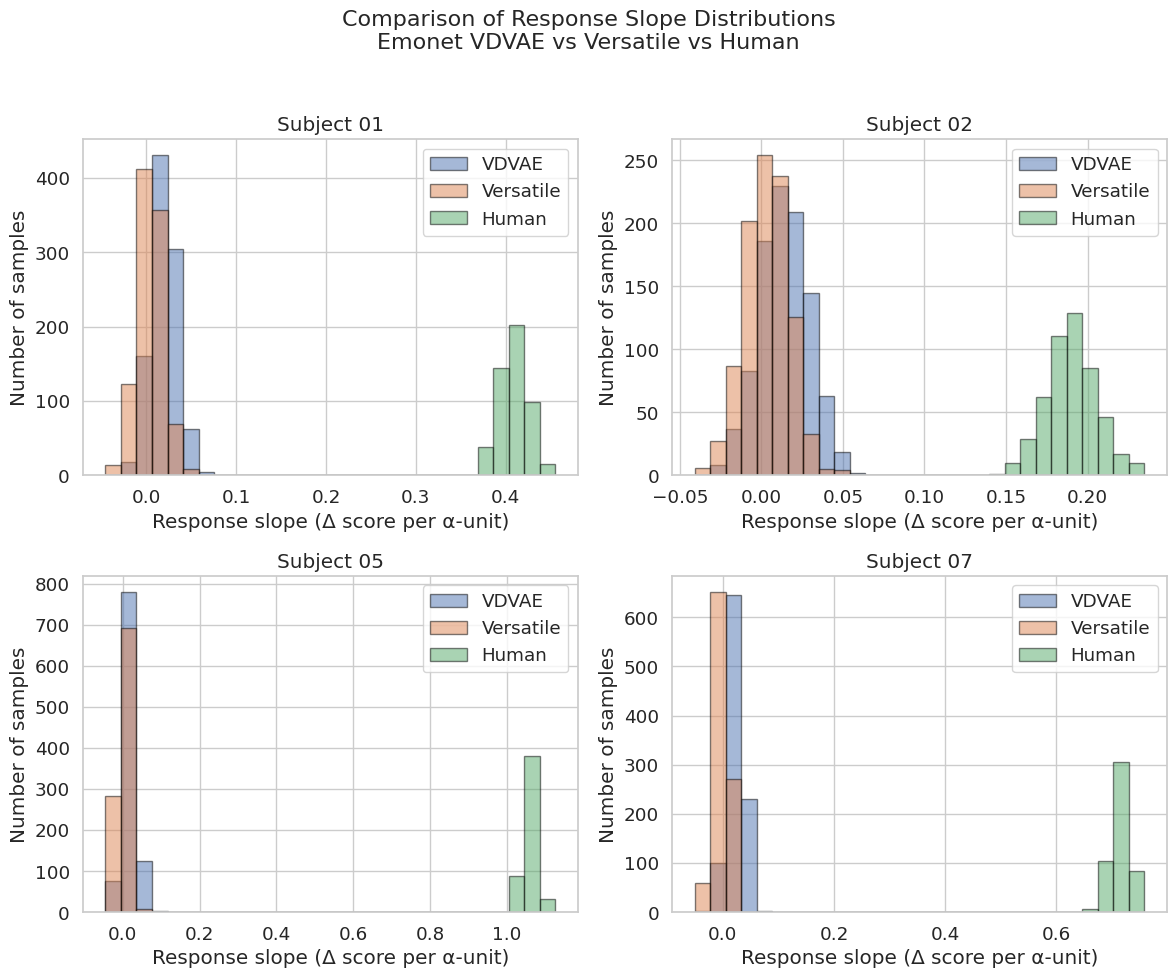

In [42]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Subjects and alpha levels
subjects = [1, 2, 5, 7]
alphas = np.array([-4, -2, 0, 2, 4])

# ✅ Load human data
human_path = "/home/rothermm/brain-diffuser/data/human_data/human_df_detrended.csv"
df_human = pd.read_csv(human_path)

# Mapping from condition to alpha
alpha_map = {
    'valence-4': -4, 'valence-2': -2, 'alpha0': 0, 'valence+2': 2, 'valence+4': 4
}

# Create one figure with subplots (one per subject)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for idx, sub in enumerate(subjects):
    # ================================
    # 📦 Load VDVAE data
    # ================================
    path_vdvae = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/emonet_vdvae_sub{sub:02d}.pkl"
    with open(path_vdvae, "rb") as f:
        data_vdvae = pickle.load(f)
    scores_vdvae = np.vstack([data_vdvae[f"alpha_{int(a)}"] for a in alphas]).T
    slopes_vdvae = np.array([np.polyfit(alphas, scores_vdvae[i, :], 1)[0] for i in range(scores_vdvae.shape[0])])

    # ================================
    # 📦 Load Versatile data
    # ================================
    path_versatile = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/emonet_versatile_sub{sub:02d}.pkl"
    with open(path_versatile, "rb") as f:
        data_versatile = pickle.load(f)
    scores_versatile = np.vstack([data_versatile[f"alpha_{int(a)}"] for a in alphas]).T
    slopes_versatile = np.array([np.polyfit(alphas, scores_versatile[i, :], 1)[0] for i in range(scores_versatile.shape[0])])

    # ================================
    # 👤 Simulate human slopes
    # ================================
    df_sub_human = df_human[df_human['SubjectID'] == sub]
    relevant_conditions = ['valence-4', 'valence-2', 'alpha0', 'valence+2', 'valence+4']
    df_sub_human = df_sub_human[df_sub_human['Condition'].isin(relevant_conditions)].copy()

    # Map conditions to alphas
    df_sub_human['Alpha'] = df_sub_human['Condition'].map(alpha_map)

    # Get mean ratings per alpha
    mean_ratings = df_sub_human.groupby('Alpha')['ValenceRating'].mean().reindex(alphas).values

    # Simulate "trial-level" variability
    simulated_slopes = []
    n_simulations = 500  # number of fake trials
    noise_std = 0.1  # adjust: how much variability to simulate

    for _ in range(n_simulations):
        noisy_ratings = mean_ratings + np.random.normal(0, noise_std, size=mean_ratings.shape)
        slope = np.polyfit(alphas, noisy_ratings, 1)[0]
        simulated_slopes.append(slope)
    simulated_slopes = np.array(simulated_slopes)

    # ================================
    # 📊 Plot histograms
    # ================================
    ax = axs[idx]
    bins = np.linspace(
        min(slopes_vdvae.min(), slopes_versatile.min(), simulated_slopes.min()),
        max(slopes_vdvae.max(), slopes_versatile.max(), simulated_slopes.max()),
        30
    )
    ax.hist(slopes_vdvae, bins=bins, alpha=0.5, label="VDVAE", edgecolor='black')
    ax.hist(slopes_versatile, bins=bins, alpha=0.5, label="Versatile", edgecolor='black')
    ax.hist(simulated_slopes, bins=bins, alpha=0.5, label="Human", edgecolor='black')

    ax.set_title(f"Subject {sub:02d}")
    ax.set_xlabel("Response slope (Δ score per α-unit)")
    ax.set_ylabel("Number of samples")
    ax.legend()

plt.suptitle("Comparison of Response Slope Distributions\nEmonet VDVAE vs Versatile vs Human", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


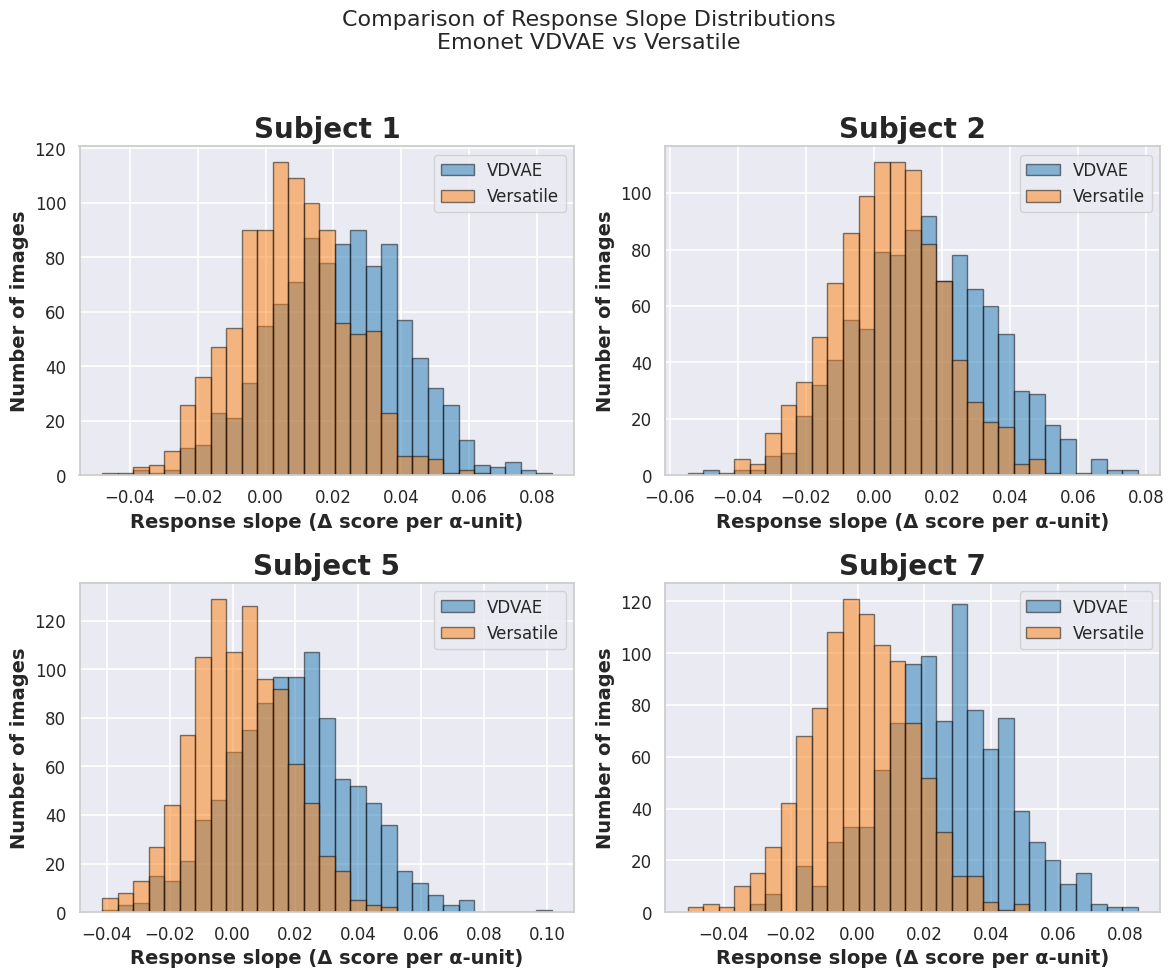

In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

subjects = [1, 2, 5, 7]
alphas = np.array([-3, -2, 0, 2, 3])

# Create one figure with subplots (one per subject)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # Flatten for easy indexing

for idx, sub in enumerate(subjects):
    # Load VDVAE data
    path_vdvae = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/emonet_vdvae_sub{sub:02d}.pkl"
    with open(path_vdvae, "rb") as f:
        data_vdvae = pickle.load(f)
    scores_vdvae = np.vstack([data_vdvae[f"alpha_{int(a)}"] for a in alphas]).T
    slopes_vdvae = np.array([np.polyfit(alphas, scores_vdvae[i, :], 1)[0] for i in range(scores_vdvae.shape[0])])

    # Load Versatile data
    path_versatile = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/emonet_versatile_sub{sub:02d}.pkl"
    with open(path_versatile, "rb") as f:
        data_versatile = pickle.load(f)
    scores_versatile = np.vstack([data_versatile[f"alpha_{int(a)}"] for a in alphas]).T
    slopes_versatile = np.array([np.polyfit(alphas, scores_versatile[i, :], 1)[0] for i in range(scores_versatile.shape[0])])

    # Determine shared bins for fair comparison
    bins = np.linspace(
        min(slopes_vdvae.min(), slopes_versatile.min()),
        max(slopes_vdvae.max(), slopes_versatile.max()),
        30
    )

    # Plot histograms
    ax = axs[idx]
    ax.hist(slopes_vdvae, bins=bins, alpha=0.5, label="VDVAE", edgecolor='black')
    ax.hist(slopes_versatile, bins=bins, alpha=0.5, label="Versatile", edgecolor='black')
    ax.set_title(f"Subject {sub}")
    ax.set_xlabel("Response slope (Δ score per α-unit)")
    ax.set_ylabel("Number of images")
    ax.legend()

plt.suptitle("Comparison of Response Slope Distributions\nEmonet VDVAE vs Versatile", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


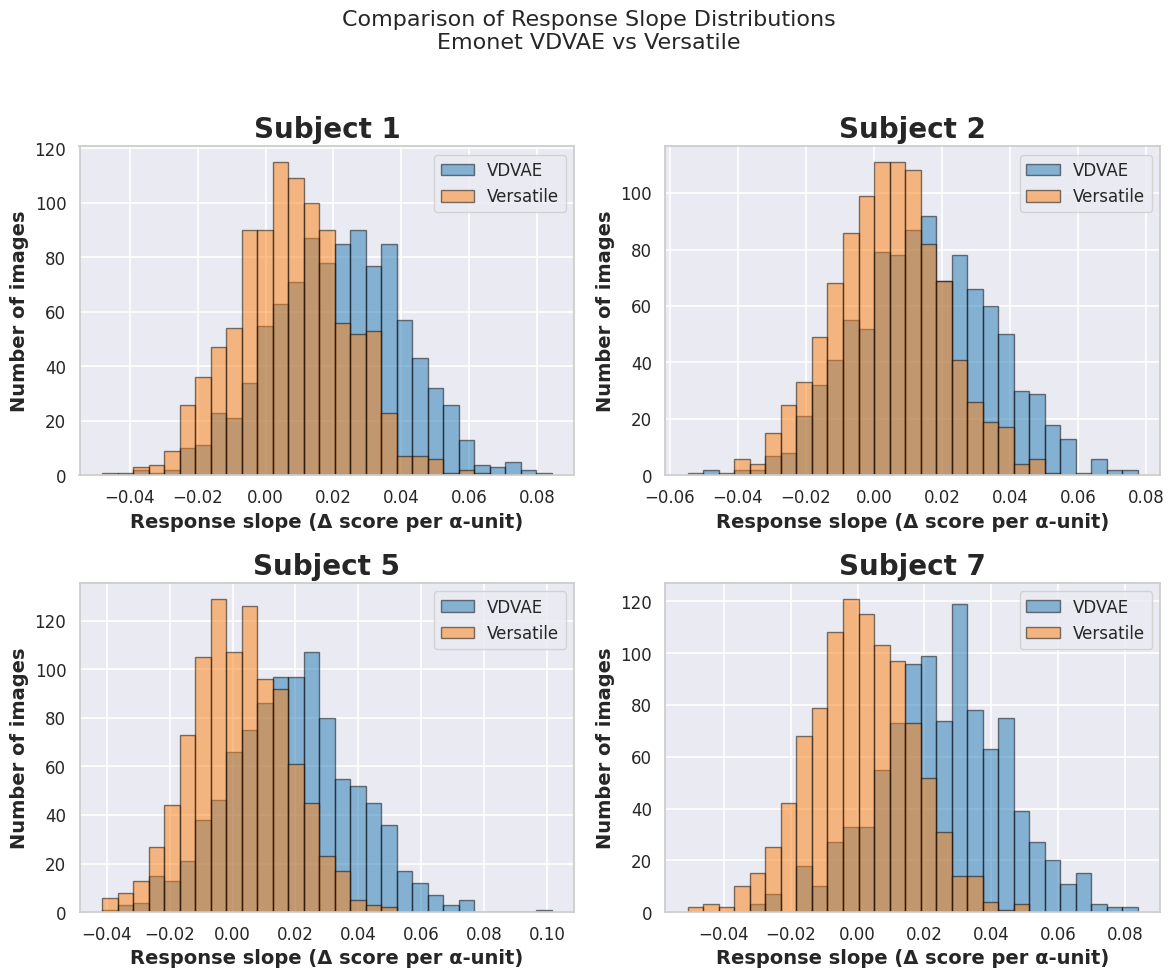

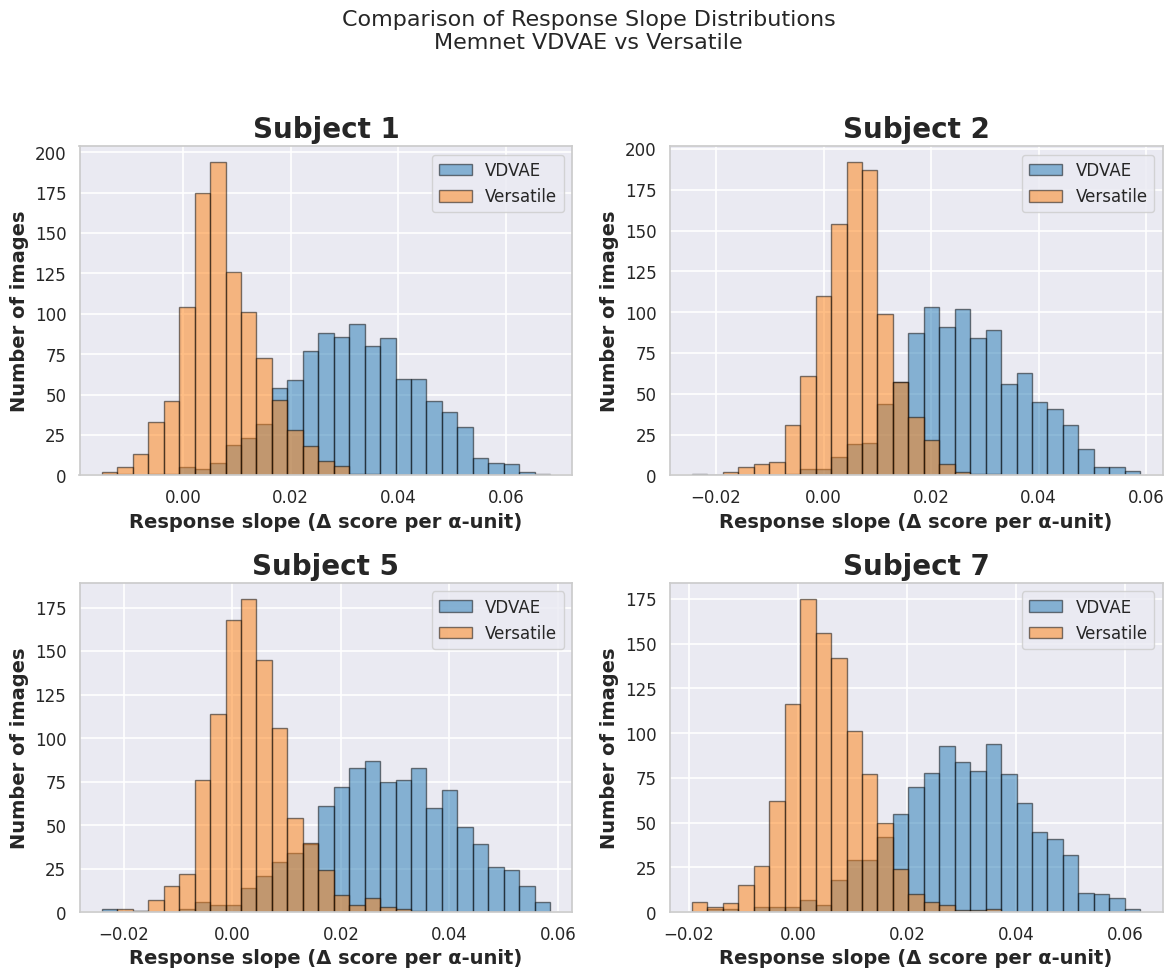

In [28]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

subjects = [1, 2, 5, 7]
alphas = np.array([-3, -2, 0, 2, 3])

# Loop over both networks
for net in ['emonet', 'memnet']:
    # One 2×2 figure per network
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()

    for idx, sub in enumerate(subjects):
        # --- VDVAE ---
        path_vdvae = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{net}_vdvae_sub{sub:02d}.pkl"
        with open(path_vdvae, "rb") as f:
            data_vdvae = pickle.load(f)
        # build matrix [n_images × n_alphas]
        scores_vdvae = np.vstack([data_vdvae[f"alpha_{int(a)}"] for a in alphas]).T
        # slope per image
        slopes_vdvae = np.array([
            np.polyfit(alphas, scores_vdvae[i, :], 1)[0]
            for i in range(scores_vdvae.shape[0])
        ])

        # --- Versatile ---
        path_versatile = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{net}_versatile_sub{sub:02d}.pkl"
        with open(path_versatile, "rb") as f:
            data_versatile = pickle.load(f)
        scores_versatile = np.vstack([data_versatile[f"alpha_{int(a)}"] for a in alphas]).T
        slopes_versatile = np.array([
            np.polyfit(alphas, scores_versatile[i, :], 1)[0]
            for i in range(scores_versatile.shape[0])
        ])

        # shared bins
        bins = np.linspace(
            min(slopes_vdvae.min(), slopes_versatile.min()),
            max(slopes_vdvae.max(), slopes_versatile.max()),
            30
        )

        # plot
        ax = axs[idx]
        ax.hist(slopes_vdvae,    bins=bins, alpha=0.5, label="VDVAE",     edgecolor='black')
        ax.hist(slopes_versatile,bins=bins, alpha=0.5, label="Versatile", edgecolor='black')
        ax.set_title(f"Subject {sub}")
        ax.set_xlabel("Response slope (Δ score per α‐unit)")
        ax.set_ylabel("Number of images")
        ax.legend()

    # super‐title & layout
    fig.suptitle(
        f"Comparison of Response Slope Distributions\n"
        f"{net.capitalize()} VDVAE vs Versatile",
        fontsize=16
    )
    plt.tight_layout(rect=[0, 0, 1, 0.96])

# finally show both figures
plt.show()


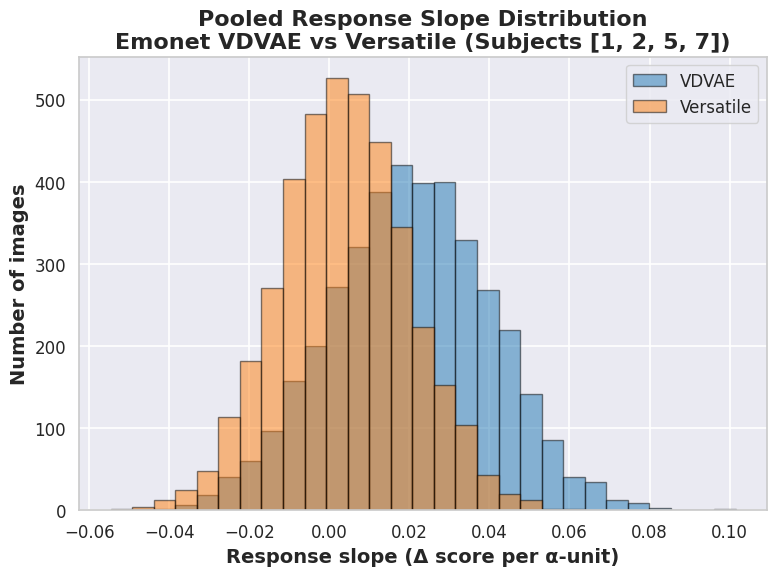

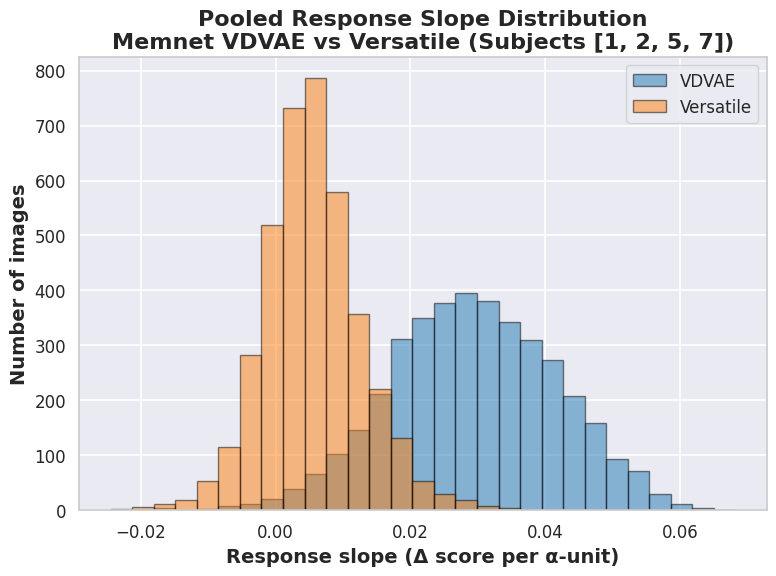

In [29]:
# … your existing code that makes the per‐subject figures …

# ─────────────────────────────────────────────────────────────────────────────
# Now: pooled (averaged) histograms across subjects for each network
# ─────────────────────────────────────────────────────────────────────────────
for net in ['emonet', 'memnet']:
    all_slopes_vdvae = []
    all_slopes_versatile = []

    # collect slopes from all subjects
    for sub in subjects:
        # VDVAE
        p_v = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{net}_vdvae_sub{sub:02d}.pkl"
        with open(p_v, "rb") as f:
            d_v = pickle.load(f)
        scores_v = np.vstack([d_v[f"alpha_{int(a)}"] for a in alphas]).T
        slopes_v = [np.polyfit(alphas, scores_v[i, :], 1)[0] for i in range(scores_v.shape[0])]
        all_slopes_vdvae.extend(slopes_v)

        # Versatile
        p_t = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{net}_versatile_sub{sub:02d}.pkl"
        with open(p_t, "rb") as f:
            d_t = pickle.load(f)
        scores_t = np.vstack([d_t[f"alpha_{int(a)}"] for a in alphas]).T
        slopes_t = [np.polyfit(alphas, scores_t[i, :], 1)[0] for i in range(scores_t.shape[0])]
        all_slopes_versatile.extend(slopes_t)

    all_slopes_vdvae = np.array(all_slopes_vdvae)
    all_slopes_versatile = np.array(all_slopes_versatile)

    # shared bins
    bins = np.linspace(
        min(all_slopes_vdvae.min(), all_slopes_versatile.min()),
        max(all_slopes_vdvae.max(), all_slopes_versatile.max()),
        30
    )

    # plot pooled histogram
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(all_slopes_vdvae,    bins=bins, alpha=0.5, label="VDVAE",     edgecolor='black')
    ax.hist(all_slopes_versatile,bins=bins, alpha=0.5, label="Versatile", edgecolor='black')

    ax.set_title(
        f"Pooled Response Slope Distribution\n"
        f"{net.capitalize()} VDVAE vs Versatile (Subjects {subjects})",
        fontsize=16
    )
    ax.set_xlabel("Response slope (Δ score per α-unit)")
    ax.set_ylabel("Number of images")
    ax.legend()

    plt.tight_layout()
    plt.show()


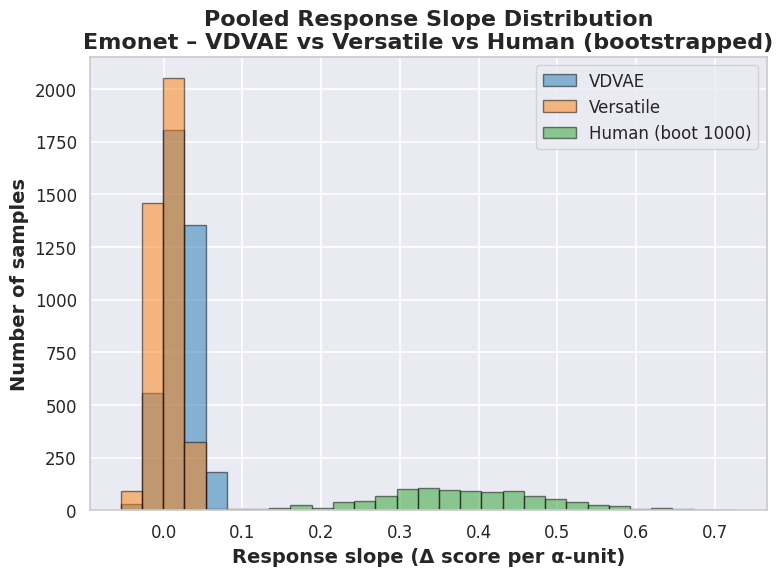

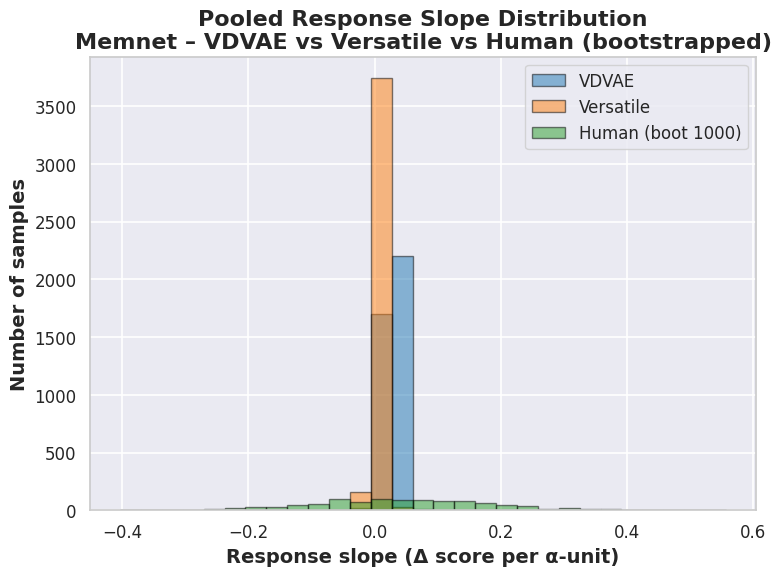

In [32]:
# … (your previous per‐subject figures and imports) …

# ─────────────────────────────────────────────────────────────────────────────
# Pooled histograms with human bootstrapped slopes (1000 replicates)
# ─────────────────────────────────────────────────────────────────────────────
import pandas as pd

# reload human data if needed
df_human = pd.read_csv("/home/rothermm/brain-diffuser/data/human_data/human_df_detrended.csv")
alpha_map = {
    'valence-4': -4, 'valence-2': -2, 'alpha0': 0, 'valence+2': 2, 'valence+4': 4,
    'mem-4':     -4, 'mem-2':     -2, 'alpha0': 0, 'mem+2':      2, 'mem+4':     4
}
df_human['Alpha'] = df_human['Condition'].map(alpha_map)

for net in ['emonet', 'memnet']:
    all_slopes_vdvae    = []
    all_slopes_versatile = []
    boot_human_slopes   = []

    # 1) Collect model‐per‐image slopes (unchanged)
    for sub in subjects:
        # VDVAE
        p_v = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{net}_vdvae_sub{sub:02d}.pkl"
        with open(p_v, "rb") as f:
            d_v = pickle.load(f)
        scores_v = np.vstack([d_v[f"alpha_{int(a)}"] for a in alphas]).T
        slopes_v = [np.polyfit(alphas, scores_v[i, :], 1)[0]
                    for i in range(scores_v.shape[0])]
        all_slopes_vdvae.extend(slopes_v)

        # Versatile
        p_t = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/{net}_versatile_sub{sub:02d}.pkl"
        with open(p_t, "rb") as f:
            d_t = pickle.load(f)
        scores_t = np.vstack([d_t[f"alpha_{int(a)}"] for a in alphas]).T
        slopes_t = [np.polyfit(alphas, scores_t[i, :], 1)[0]
                    for i in range(scores_t.shape[0])]
        all_slopes_versatile.extend(slopes_t)

    # 2) Prepare human pivot table (one row per SubjectID×image across the 5 α’s)
    if net == 'emonet':
        conds = ['valence-4','valence-2','alpha0','valence+2','valence+4']
        col   = 'ValenceRating'
    else:
        conds = ['mem-4','mem-2','alpha0','mem+2','mem+4']
        col   = 'MemorabilityRating'

    human_net = df_human[df_human['Condition'].isin(conds)].copy()
    # fabricate an ImageIdx within each (SubjectID,Alpha) so we can pivot
    human_net['ImageIdx'] = human_net.groupby(['SubjectID','Alpha']).cumcount()
    pivot = human_net.pivot(
        index=['SubjectID','ImageIdx'],
        columns='Alpha',
        values=col
    ).dropna(how='any')  # drop any incomplete

    # 3) Bootstrap 1000 slopes
    n_rows = pivot.shape[0]
    for _ in range(1000):
        sample = pivot.sample(n=n_rows, replace=True)
        mean_ratings = sample.mean(axis=0).values  # order matches sorted alphas
        boot_human_slopes.append(np.polyfit(alphas, mean_ratings, 1)[0])

    # convert to arrays
    all_slopes_vdvae     = np.array(all_slopes_vdvae)
    all_slopes_versatile = np.array(all_slopes_versatile)
    boot_human_slopes    = np.array(boot_human_slopes)

    # 4) shared bins
    combined = np.concatenate([
        all_slopes_vdvae,
        all_slopes_versatile,
        boot_human_slopes
    ])
    bins = np.linspace(combined.min(), combined.max(), 30)

    # 5) plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(all_slopes_vdvae,     bins=bins, alpha=0.5, label="VDVAE",     edgecolor='black')
    ax.hist(all_slopes_versatile, bins=bins, alpha=0.5, label="Versatile", edgecolor='black')
    ax.hist(boot_human_slopes,    bins=bins, alpha=0.5, label="Human (boot 1000)", edgecolor='black')

    ax.set_title(
        f"Pooled Response Slope Distribution\n"
        f"{net.capitalize()} – VDVAE vs Versatile vs Human (bootstrapped)",
        fontsize=16
    )
    ax.set_xlabel("Response slope (Δ score per α-unit)")
    ax.set_ylabel("Number of samples")
    ax.legend()

    plt.tight_layout()
    plt.show()


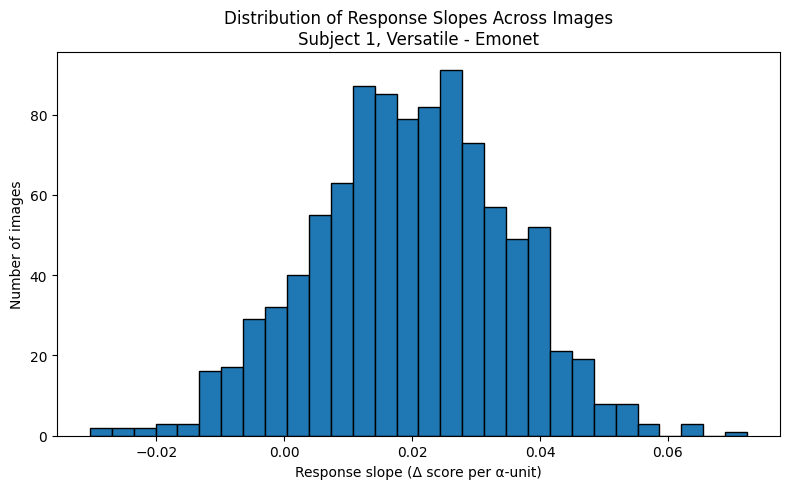

In [21]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load data for subject 1
sub = 1
path = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/emonet_vdvae_sub{sub:02d}.pkl"
with open(path, "rb") as f:
    data = pickle.load(f)

# Define alpha levels and extract scores (shape: n_images x n_alphas)
alphas = np.array([-4, -3, -2, 0, 2, 3, 4])
scores = np.vstack([data[f"alpha_{int(a)}"] for a in alphas]).T  # shape (n_images, n_alphas)

# Compute slope for each image (response slope per α-unit)
# slopes array will have one slope per image
slopes = np.array([
    np.polyfit(alphas, scores[i, :], 1)[0]
    for i in range(scores.shape[0])
])

# Plot histogram of per-image slopes
plt.figure(figsize=(8, 5))
plt.hist(slopes, bins=30, edgecolor='black')
plt.xlabel("Response slope (Δ score per α-unit)")
plt.ylabel("Number of images")
plt.title("Distribution of Response Slopes Across Images\nSubject 1, Versatile - Emonet")
plt.tight_layout()
plt.show()


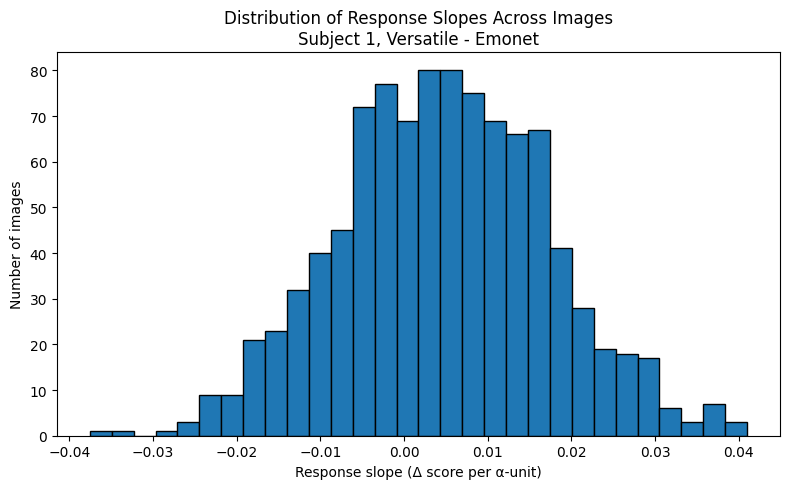

In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load data for subject 1
sub = 1
path = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/emonet_versatile_sub{sub:02d}.pkl"
with open(path, "rb") as f:
    data = pickle.load(f)

# Define alpha levels and extract scores (shape: n_images x n_alphas)
alphas = np.array([-4, -3, -2, 0, 2, 3, 4])
scores = np.vstack([data[f"alpha_{int(a)}"] for a in alphas]).T  # shape (n_images, n_alphas)

# Compute slope for each image (response slope per α-unit)
# slopes array will have one slope per image
slopes = np.array([
    np.polyfit(alphas, scores[i, :], 1)[0]
    for i in range(scores.shape[0])
])

# Plot histogram of per-image slopes
plt.figure(figsize=(8, 5))
plt.hist(slopes, bins=30, edgecolor='black')
plt.xlabel("Response slope (Δ score per α-unit)")
plt.ylabel("Number of images")
plt.title("Distribution of Response Slopes Across Images\nSubject 1, Versatile - Emonet")
plt.tight_layout()
plt.show()


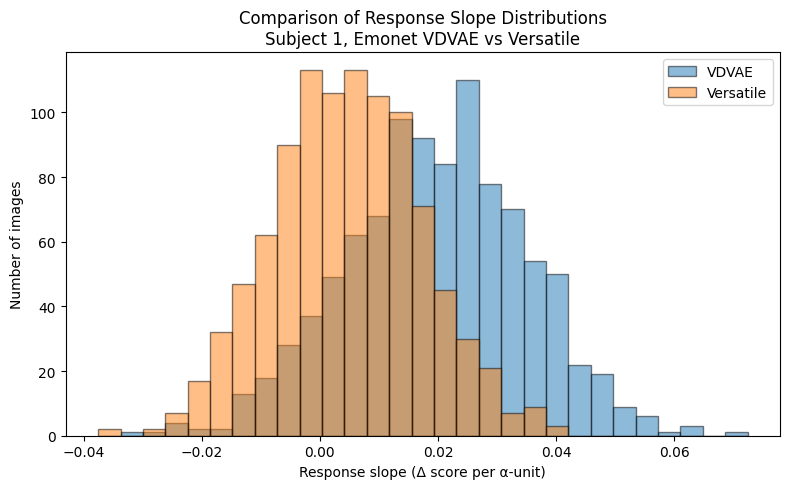

In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load and compute slopes for subject 1, Emonet-VDVAE
sub = 1
path_vdvae = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/emonet_vdvae_sub{sub:02d}.pkl"
with open(path_vdvae, "rb") as f:
    data_vdvae = pickle.load(f)

alphas = np.array([-4, -3, -2, 0, 2, 3, 4])
scores_vdvae = np.vstack([data_vdvae[f"alpha_{int(a)}"] for a in alphas]).T
slopes_vdvae = np.array([np.polyfit(alphas, scores_vdvae[i, :], 1)[0] for i in range(scores_vdvae.shape[0])])

# Load and compute slopes for subject 1, Emonet-Versatile
path_versatile = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/emonet_versatile_sub{sub:02d}.pkl"
with open(path_versatile, "rb") as f:
    data_versatile = pickle.load(f)

scores_versatile = np.vstack([data_versatile[f"alpha_{int(a)}"] for a in alphas]).T
slopes_versatile = np.array([np.polyfit(alphas, scores_versatile[i, :], 1)[0] for i in range(scores_versatile.shape[0])])

# Plot both histograms on the same axes
plt.figure(figsize=(8, 5))
bins = np.linspace(
    min(slopes_vdvae.min(), slopes_versatile.min()),
    max(slopes_vdvae.max(), slopes_versatile.max()),
    30
)
plt.hist(slopes_vdvae, bins=bins, alpha=0.5, label="VDVAE", edgecolor='black')
plt.hist(slopes_versatile, bins=bins, alpha=0.5, label="Versatile", edgecolor='black')

plt.xlabel("Response slope (Δ score per α-unit)")
plt.ylabel("Number of images")
plt.title("Comparison of Response Slope Distributions\nSubject 1, Emonet VDVAE vs Versatile")
plt.legend()
plt.tight_layout()
plt.show()


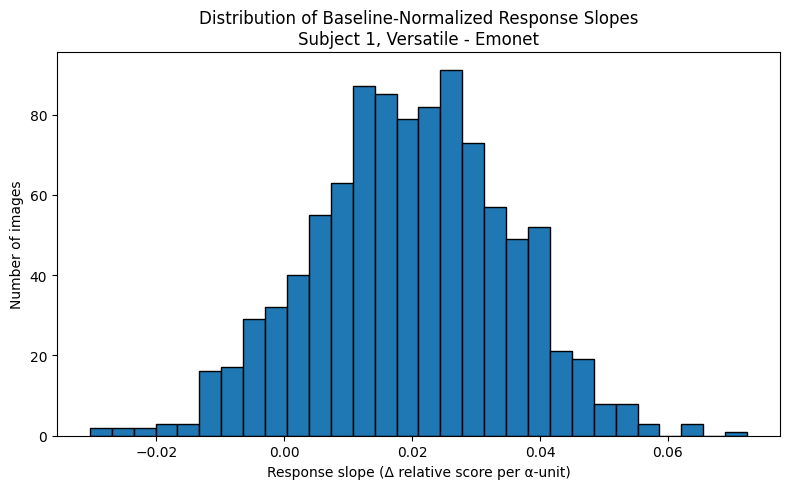

In [24]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load data for subject 1
sub = 1
path = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{sub:02d}/emonet_vdvae_sub{sub:02d}.pkl"
with open(path, "rb") as f:
    data = pickle.load(f)

# Define alpha levels and extract scores (shape: n_images x n_alphas)
alphas = np.array([-4, -3, -2, 0, 2, 3, 4])
scores = np.vstack([data[f"alpha_{int(a)}"] for a in alphas]).T  # shape (n_images, n_alphas)

# Subtract the alpha=0 (baseline) score from every alpha for each image
baseline_idx = np.where(alphas == 0)[0][0]
baseline_scores = scores[:, baseline_idx]
scores_rel = scores - baseline_scores[:, np.newaxis]

# Compute slope for each image on the baseline‐normalized scores
slopes = np.array([
    np.polyfit(alphas, scores_rel[i, :], 1)[0]
    for i in range(scores_rel.shape[0])
])

# Plot histogram of per-image slopes
plt.figure(figsize=(8, 5))
plt.hist(slopes, bins=30, edgecolor='black')
plt.xlabel("Response slope (Δ relative score per α-unit)")
plt.ylabel("Number of images")
plt.title("Distribution of Baseline‐Normalized Response Slopes\nSubject 1, Versatile - Emonet")
plt.tight_layout()
plt.show()


/tmp/ipykernel_683094/905211582.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model")


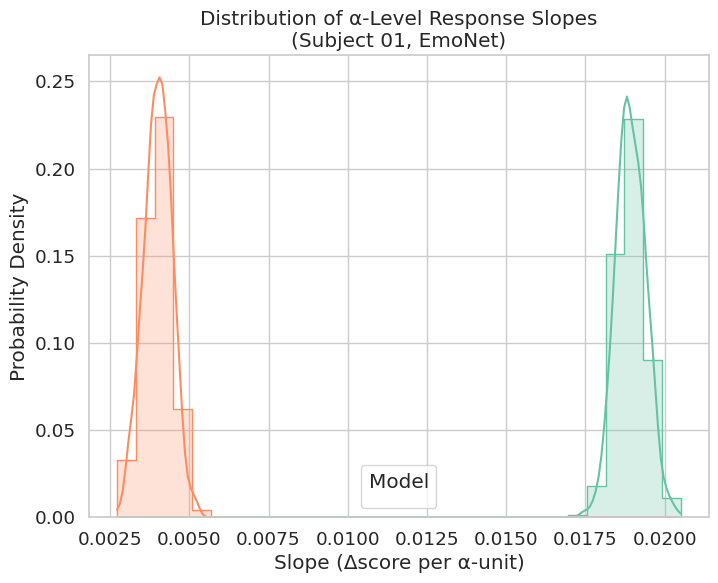

In [25]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.utils import resample

# Parameters
n_bootstrap = 1000
subject = 1
network = 'emonet'
models = ['vdvae', 'versatile']
alpha_levels = ['alpha_-4', 'alpha_-2', 'alpha_0', 'alpha_2', 'alpha_4']

# Set Seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Prepare plot
plt.figure(figsize=(8, 6))
slope_data = []

for model in models:
    # Load model data directly
    file_name = f"/home/rothermm/brain-diffuser/results/assessor_scores/subj{subject:02d}/{network}_{model}_sub{subject:02d}.pkl"
    with open(file_name, "rb") as f:
        data = pickle.load(f)
    
    # Stack valence matrix (rows = images, cols = alpha levels)
    valence_matrix = np.column_stack([np.array(data[a]) for a in alpha_levels])
    alpha_numeric = [int(a.split('_')[1]) for a in alpha_levels]

    # Bootstrap slopes
    slopes = []
    for _ in range(n_bootstrap):
        boot_rows = resample(valence_matrix, replace=True, n_samples=valence_matrix.shape[0])
        mean_boot = boot_rows.mean(axis=0)
        slope, _, _, _, _ = linregress(alpha_numeric, mean_boot)
        slopes.append(slope)

    # Store for plotting
    slope_df = pd.DataFrame({'Slope': slopes, 'Model': model})
    slope_data.append(slope_df)

# Combine models into one DataFrame
combined_df = pd.concat(slope_data)

# Plot histogram + KDE
sns.histplot(combined_df, x="Slope", hue="Model", kde=True,
             bins=30, stat="probability", element="step",
             fill=True, palette="Set2")

plt.title("Distribution of α-Level Response Slopes\n(Subject 01, EmoNet)")
plt.xlabel("Slope (Δscore per α-unit)")
plt.ylabel("Probability Density")
plt.legend(title="Model")
plt.show()


# normalized mean trends

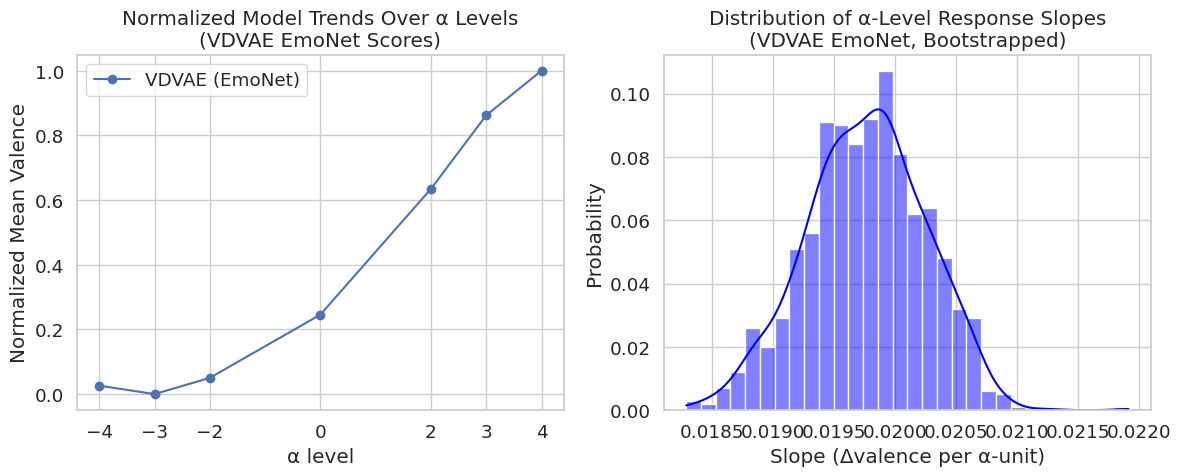

In [26]:
# Cell 1: Imports
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.utils import resample

# Cell 2: Load model data
pkl_path = "/home/rothermm/brain-diffuser/results/assessor_scores/subj01/emonet_vdvae_sub01.pkl"
with open(pkl_path, "rb") as f:
    data = pickle.load(f)

# Cell 3: Prepare data
# Extract and sort alpha levels numerically
alpha_levels = sorted(data.keys(), key=lambda x: int(x.split('_')[1]))
alpha_numeric = [int(a.split('_')[1]) for a in alpha_levels]

# Stack valence scores into 2D array: rows = images, cols = alpha levels
valence_matrix = np.column_stack([np.array(data[a]) for a in alpha_levels])

# Cell 4: Panel A - Mean valence across images per alpha level
# Each column in valence_matrix corresponds to one alpha_level
mean_valence_per_alpha = valence_matrix.mean(axis=0)

# Min-max normalize
min_val, max_val = mean_valence_per_alpha.min(), mean_valence_per_alpha.max()
normalized_mean_valence = (mean_valence_per_alpha - min_val) / (max_val - min_val)

# Build DataFrame for plotting
mean_ratings = pd.DataFrame({
    'alpha_level': alpha_numeric,
    'NormalizedValence': normalized_mean_valence
})

# Cell 5: Panel B - Bootstrap slopes
n_bootstrap = 1000
slopes = []

for i in range(n_bootstrap):
    # Sample images (rows) with replacement
    boot_rows = resample(valence_matrix, replace=True, n_samples=valence_matrix.shape[0])
    
    # Compute mean valence per alpha level for bootstrap sample
    mean_boot = boot_rows.mean(axis=0)
    
    # Fit slope across alpha levels
    slope, _, _, _, _ = linregress(alpha_numeric, mean_boot)
    slopes.append(slope)

# Cell 6: Plotting
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel A: Normalized mean valence ratings
axes[0].plot(
    mean_ratings['alpha_level'],
    mean_ratings['NormalizedValence'],
    marker='o',
    linestyle='-',
    label='VDVAE (EmoNet)'
)
axes[0].set_title("Normalized Model Trends Over α Levels\n(VDVAE EmoNet Scores)")
axes[0].set_xlabel("α level")
axes[0].set_ylabel("Normalized Mean Valence")
axes[0].set_xticks(alpha_numeric)
axes[0].legend()

# Panel B: Bootstrap slope distribution
sns.histplot(slopes, kde=True, color='blue', bins=30, ax=axes[1], stat="probability")
axes[1].set_title("Distribution of α-Level Response Slopes\n(VDVAE EmoNet, Bootstrapped)")
axes[1].set_xlabel("Slope (Δvalence per α-unit)")
axes[1].set_ylabel("Probability")

plt.tight_layout()
plt.show()


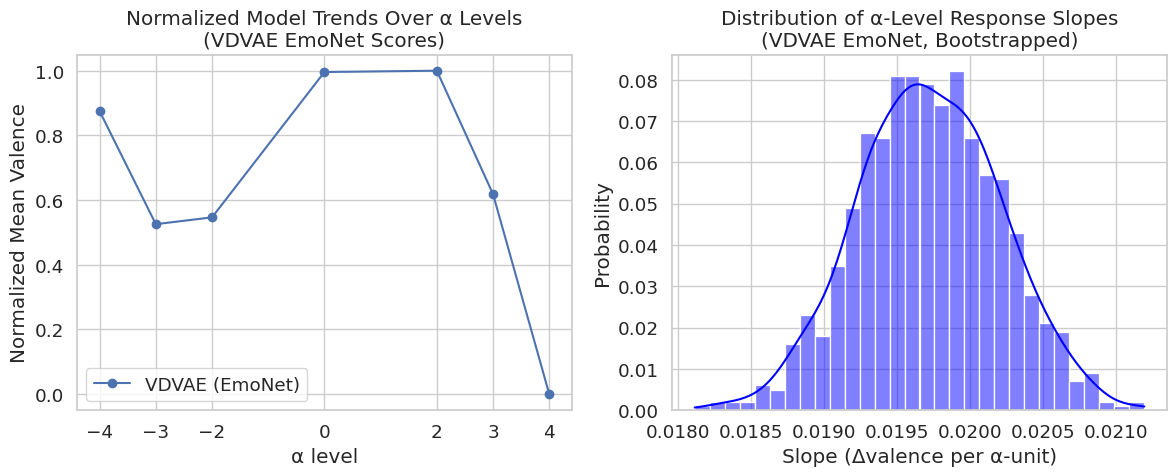

In [27]:
# Cell 1: Imports
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.utils import resample

# Cell 2: Load model data
pkl_path = "/home/rothermm/brain-diffuser/results/assessor_scores/subj01/emonet_vdvae_sub01.pkl"
with open(pkl_path, "rb") as f:
    data = pickle.load(f)

# Cell 3: Prepare data
# Extract and sort alpha levels numerically
alpha_levels = sorted(data.keys(), key=lambda x: int(x.split('_')[1]))
alpha_numeric = [int(a.split('_')[1]) for a in alpha_levels]

# Stack valence scores into 2D array: rows = images, cols = alpha levels
valence_matrix = np.column_stack([np.array(data[a]) for a in alpha_levels])

# Build long DataFrame for Panel A
df_model = pd.DataFrame({
    "alpha_level": np.repeat(alpha_numeric, valence_matrix.shape[0]),
    "ValenceRating": valence_matrix.flatten()
})

# Cell 4: Normalize mean valence ratings (Panel A)
mean_ratings = (
    df_model.groupby('alpha_level')['ValenceRating']
    .mean()
    .reset_index()
    .sort_values('alpha_level')
)

# Min-max normalize
min_val, max_val = mean_ratings['ValenceRating'].min(), mean_ratings['ValenceRating'].max()
mean_ratings['NormalizedValence'] = (mean_ratings['ValenceRating'] - min_val) / (max_val - min_val)

# Cell 5: Bootstrap slopes (Panel B)
n_bootstrap = 1000
slopes = []

for i in range(n_bootstrap):
    # Sample images (rows) with replacement
    boot_rows = resample(valence_matrix, replace=True, n_samples=valence_matrix.shape[0])
    
    # Compute mean valence per alpha level for bootstrap sample
    mean_boot = boot_rows.mean(axis=0)
    
    # Fit slope across alpha levels
    slope, _, _, _, _ = linregress(alpha_numeric, mean_boot)
    slopes.append(slope)

# Cell 6: Plotting
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel A: Normalized mean valence ratings
axes[0].plot(
    mean_ratings['alpha_level'],
    mean_ratings['NormalizedValence'],
    marker='o',
    linestyle='-',
    label='VDVAE (EmoNet)'
)
axes[0].set_title("Normalized Model Trends Over α Levels\n(VDVAE EmoNet Scores)")
axes[0].set_xlabel("α level")
axes[0].set_ylabel("Normalized Mean Valence")
axes[0].set_xticks(alpha_numeric)
axes[0].legend()

# Panel B: Bootstrap slope distribution
sns.histplot(slopes, kde=True, color='blue', bins=30, ax=axes[1], stat="probability")
axes[1].set_title("Distribution of α-Level Response Slopes\n(VDVAE EmoNet, Bootstrapped)")
axes[1].set_xlabel("Slope (Δvalence per α-unit)")
axes[1].set_ylabel("Probability")

plt.tight_layout()
plt.show()


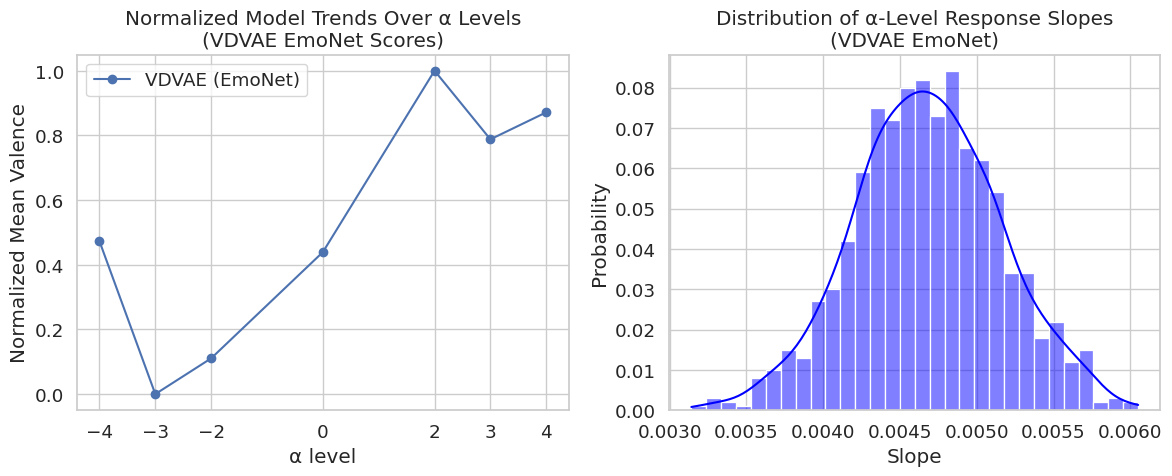

In [28]:
# Cell 1: Imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.utils import resample

# Cell 2: Load model data
pkl_path = "/home/rothermm/brain-diffuser/results/assessor_scores/subj01/emonet_versatile_sub01.pkl"
with open(pkl_path, "rb") as f:
    data = pickle.load(f)

# Cell 3: Prepare DataFrame
# Extract alpha levels and sort them numerically
alpha_levels = sorted(data.keys(), key=lambda x: int(x.split('_')[1]))
alpha_numeric = [int(a.split('_')[1]) for a in alpha_levels]

# Assuming each `data[alpha_*]` contains an array of valence scores
# (Adjust 'valence' indexing if needed depending on data structure)
valence_scores = [np.array(data[a]) for a in alpha_levels]

# Build a long DataFrame: each row is (alpha_level, score)
import pandas as pd
df_model = pd.DataFrame({
    "alpha_level": np.repeat(alpha_numeric, [len(v) for v in valence_scores]),
    "ValenceRating": np.concatenate(valence_scores)
})

# Cell 4: Normalize mean valence ratings
mean_ratings = (
    df_model.groupby('alpha_level')['ValenceRating']
    .mean()
    .reset_index()
    .sort_values('alpha_level')
)

# Min-max normalize
min_val, max_val = mean_ratings['ValenceRating'].min(), mean_ratings['ValenceRating'].max()
mean_ratings['NormalizedValence'] = (mean_ratings['ValenceRating'] - min_val) / (max_val - min_val)

# Cell 5: Bootstrap slopes
n_bootstrap = 1000
slopes = []

for i in range(n_bootstrap):
    boot_df = resample(df_model, replace=True, n_samples=len(df_model))
    slope, _, _, _, _ = linregress(boot_df['alpha_level'], boot_df['ValenceRating'])
    slopes.append(slope)

# Cell 6: Plotting
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel A: Normalized mean valence ratings
axes[0].plot(
    mean_ratings['alpha_level'],
    mean_ratings['NormalizedValence'],
    marker='o',
    linestyle='-',
    label='VDVAE (EmoNet)'
)
axes[0].set_title("Normalized Model Trends Over α Levels\n(VDVAE EmoNet Scores)")
axes[0].set_xlabel("α level")
axes[0].set_ylabel("Normalized Mean Valence")
axes[0].set_xticks(alpha_numeric)
axes[0].legend()

# Panel B: Bootstrap slope distribution
sns.histplot(slopes, kde=True, color='blue', bins=30, ax=axes[1], stat="probability")
axes[1].set_title("Distribution of α-Level Response Slopes\n(VDVAE EmoNet)")
axes[1].set_xlabel("Slope")
axes[1].set_ylabel("Probability")

plt.tight_layout()
plt.show()
